In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad, numpy as np
from scipy import sparse
from anndata import AnnData
import matplotlib.pyplot as plt
import scanpy.external as sce
import bbknn

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.12.0 pandas==2.0.3 scikit-learn==1.2.2 statsmodels==0.14.0rc0 python-igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10


In [2]:
#library(Seurat)

In [3]:
# Paths to the datasets

ko_data = sc.read_10x_mtx('/data/BIOL5177/Assessment/KO1', var_names='gene_symbols', cache=True)
wt1_data = sc.read_10x_mtx('/data/BIOL5177/Assessment/WT1', var_names='gene_symbols', cache=True)
wt2_data = sc.read_10x_mtx('/data/BIOL5177/Assessment/WT2', var_names='gene_symbols', cache=True)
wt3_data = sc.read_10x_mtx('/data/BIOL5177/Assessment/WT3', var_names='gene_symbols', cache=True)

... reading from cache file cache/data-BIOL5177-Assessment-KO1-matrix.h5ad
... reading from cache file cache/data-BIOL5177-Assessment-WT1-matrix.h5ad
... reading from cache file cache/data-BIOL5177-Assessment-WT2-matrix.h5ad
... reading from cache file cache/data-BIOL5177-Assessment-WT3-matrix.h5ad


In [4]:
# Paths to the datasets
#ko_data <- Read10X(data.dir = "/data/BIOL5177/Assessment/KO1")
#wt1_data <- Read10X(data.dir = "/data/BIOL5177/Assessment/WT1")
#wt2_data <- Read10X(data.dir = "/data/BIOL5177/Assessment/WT2")
#wt3_data <- Read10X(data.dir = "/data/BIOL5177/Assessment/WT3")

In [5]:
# Creating mice -mt , Standart pre-processing
# KO

ko_data.var_names_make_unique()
ko_data.var["mt"] = ko_data.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(ko_data, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True) 
sc.pp.filter_cells(ko_data, min_genes=200)
sc.pp.filter_genes(ko_data, min_cells=3)
sc.pp.normalize_total(ko_data, target_sum=1e4)
sc.pp.log1p(ko_data)

# WT1

wt1_data.var_names_make_unique()
wt1_data.var["mt"] = wt1_data.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(wt1_data, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True) 
sc.pp.filter_cells(wt1_data, min_genes=200)
sc.pp.filter_genes(wt1_data, min_cells=3)
sc.pp.normalize_total(wt1_data, target_sum=1e4)
sc.pp.log1p(wt1_data)


# WT2

wt2_data.var_names_make_unique()
wt2_data.var["mt"] = wt2_data.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(wt2_data, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True) 
sc.pp.filter_cells(wt2_data, min_genes=200)
sc.pp.filter_genes(wt2_data, min_cells=3)
sc.pp.normalize_total(wt2_data, target_sum=1e4)
sc.pp.log1p(wt2_data)

# WT3

wt3_data.var_names_make_unique()
wt3_data.var["mt"] = wt3_data.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(wt3_data, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True) 
sc.pp.filter_cells(wt3_data, min_genes=200)
sc.pp.filter_genes(wt3_data, min_cells=3)
sc.pp.normalize_total(wt3_data, target_sum=1e4)
sc.pp.log1p(wt3_data)


filtered out 23 cells that have less than 200 genes expressed
filtered out 16898 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
filtered out 9 cells that have less than 200 genes expressed
filtered out 18565 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
filtered out 12 cells that have less than 200 genes expressed
filtered out 16224 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
filtered out 18 cells that have less than 200 genes expressed
filtered out 16027 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)


In [6]:
#Create Seurat objects
#ko_seurat <- CreateSeuratObject(counts = ko_data, project = "KO", min.cells = 3, min.features = 200)
#wt1_seurat <- CreateSeuratObject(counts = wt1_data, project = "WT1", min.cells = 3, min.features = 200)
#wt2_seurat <- CreateSeuratObject(counts = wt2_data, project = "WT2", min.cells = 3, min.features = 200)
#wt3_seurat <- CreateSeuratObject(counts = wt3_data, project = "WT3", min.cells = 3, min.features = 200)
#ko_seurat[["percent.mt"]] <- PercentageFeatureSet(ko_seurat, pattern = "^mt-")
#wt1_seurat[["percent.mt"]] <- PercentageFeatureSet(wt1_seurat, pattern = "^mt-")
#wt2_seurat[["percent.mt"]] <- PercentageFeatureSet(wt2_seurat, pattern = "^mt-")
#wt3_seurat[["percent.mt"]] <- PercentageFeatureSet(wt3_seurat, pattern = "^mt-")
#ko_seurat <- NormalizeData(ko_seurat, normalization.method = "LogNormalize", scale.factor = 10000)
#wt1_seurat <- NormalizeData(wt1_seurat, normalization.method = "LogNormalize", scale.factor = 10000)
#wt2_seurat <- NormalizeData(wt2_seurat, normalization.method = "LogNormalize", scale.factor = 10000)
#wt3_seurat <- NormalizeData(wt3_seurat, normalization.method = "LogNormalize", scale.factor = 10000)

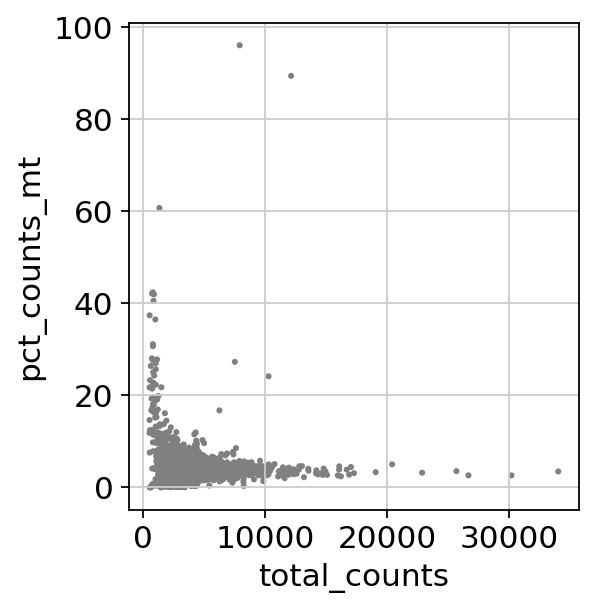

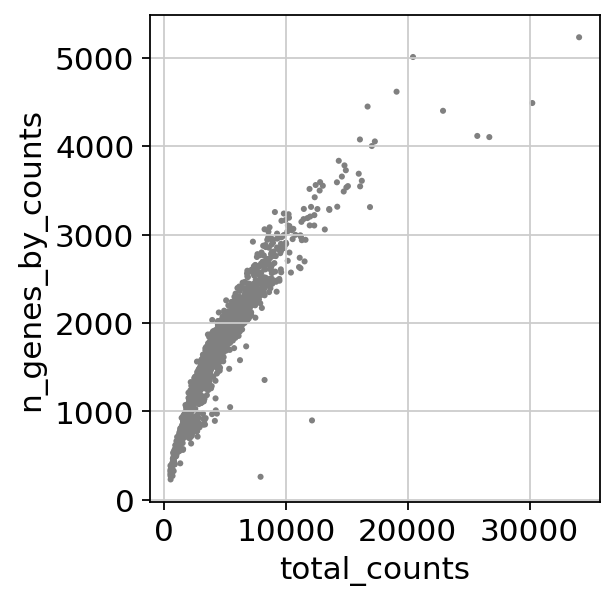

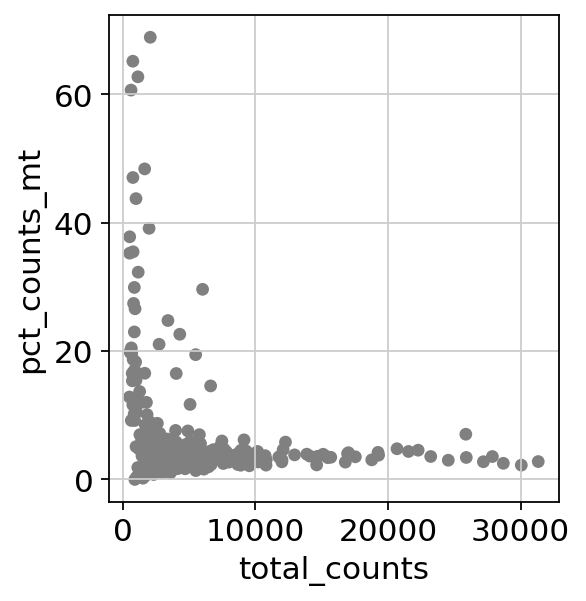

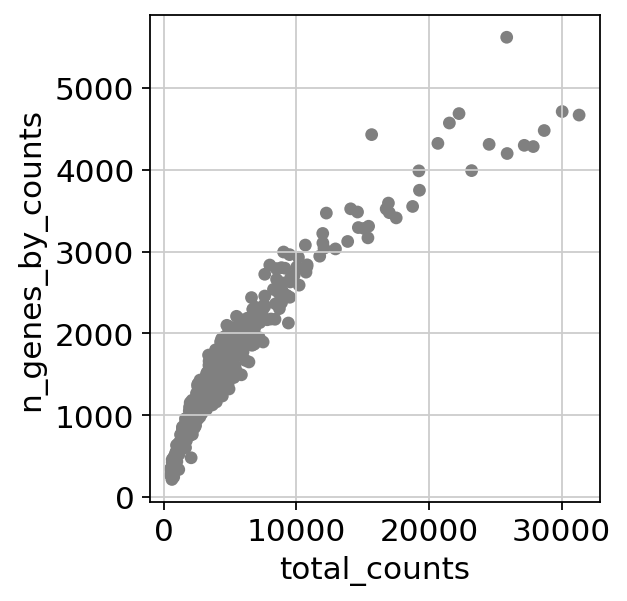

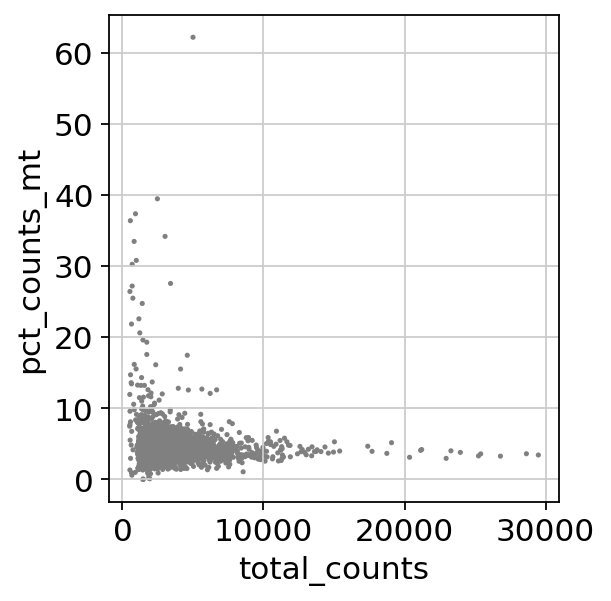

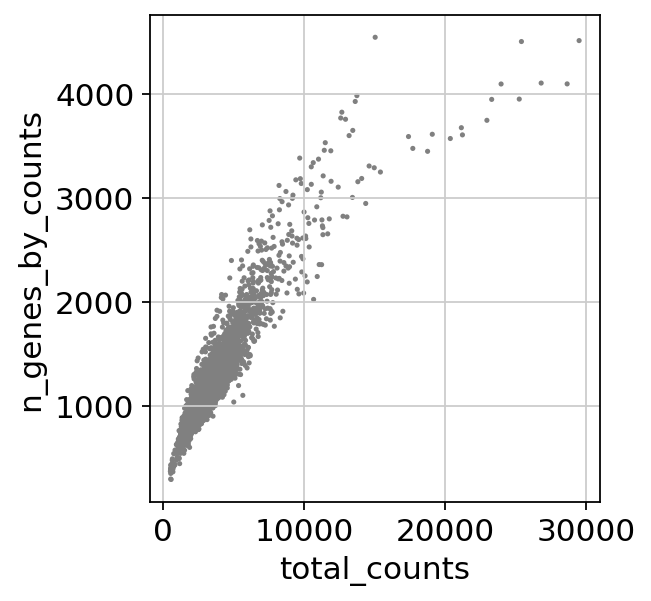

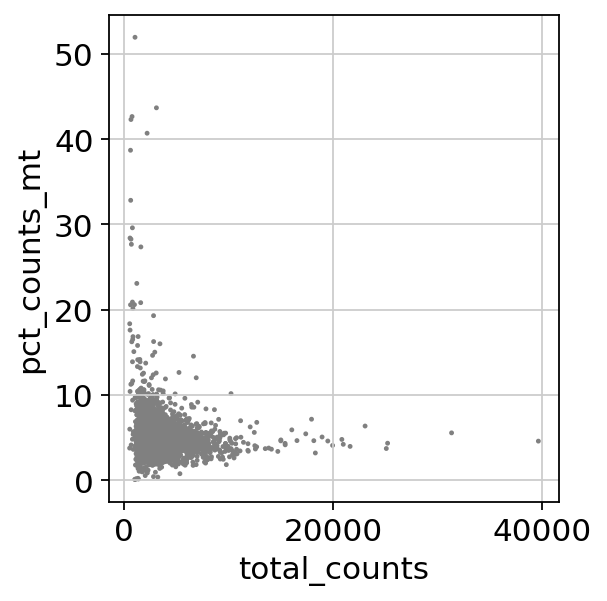

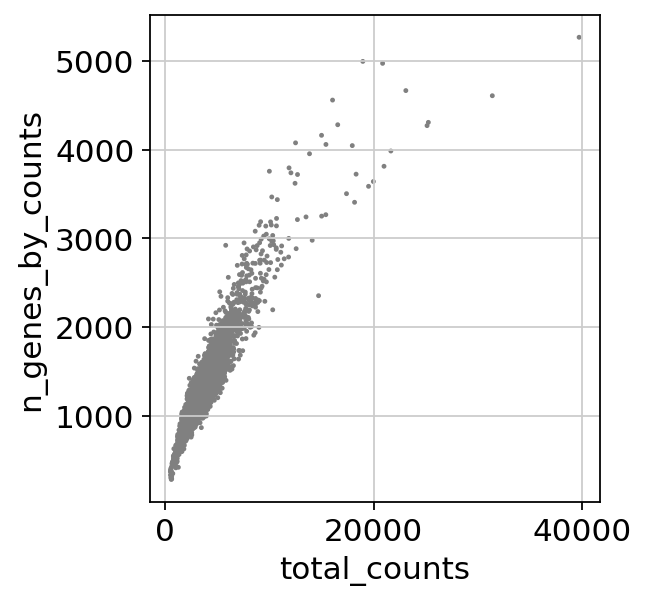

In [7]:
# Plotting total_counts and pct_counts_mt to see where is -mt values stand for so that we can remove outliers
# KO
sc.pl.scatter(ko_data, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(ko_data, x="total_counts", y="n_genes_by_counts")
# WT1
sc.pl.scatter(wt1_data, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(wt1_data, x="total_counts", y="n_genes_by_counts")
# WT2
sc.pl.scatter(wt2_data, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(wt2_data, x="total_counts", y="n_genes_by_counts")
# WT3
sc.pl.scatter(wt3_data, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(wt3_data, x="total_counts", y="n_genes_by_counts")

In [8]:
#Standard pre-processing, checking limits for outliers

#plot1 <- FeatureScatter(ko_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
#plot2 <- FeatureScatter(ko_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
#plot1 + plot2

#plot1 <- FeatureScatter(wt1_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
#plot2 <- FeatureScatter(wt1_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
#plot1 + plot2

#plot1 <- FeatureScatter(wt2_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
#plot2 <- FeatureScatter(wt2_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
#plot1 + plot2

#plot1 <- FeatureScatter(wt3_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
#plot2 <- FeatureScatter(wt3_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
#plot1 + plot2

In [9]:
# Removing Outliers in the data

# KO
upper_lim = np.quantile(ko_data.obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(ko_data.obs.n_genes_by_counts.values, .02)
ko_data = ko_data[(ko_data.obs.n_genes_by_counts < upper_lim) & (ko_data.obs.n_genes_by_counts > lower_lim)]
ko_data = ko_data[ko_data.obs.pct_counts_mt < 20]

# WT1
upper_lim = np.quantile(wt1_data.obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(wt1_data.obs.n_genes_by_counts.values, .02)
wt1_data = wt1_data[(wt1_data.obs.n_genes_by_counts < upper_lim) & (wt1_data.obs.n_genes_by_counts > lower_lim)]
wt1_data = wt1_data[wt1_data.obs.pct_counts_mt < 20]

# WT2
upper_lim = np.quantile(wt2_data.obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(wt2_data.obs.n_genes_by_counts.values, .02)
wt2_data = wt2_data[(wt2_data.obs.n_genes_by_counts < upper_lim) & (wt2_data.obs.n_genes_by_counts > lower_lim)]
wt2_data = wt2_data[wt2_data.obs.pct_counts_mt < 10]

# WT3
upper_lim = np.quantile(wt3_data.obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(wt3_data.obs.n_genes_by_counts.values, .02)
wt3_data = wt3_data[(wt3_data.obs.n_genes_by_counts < upper_lim) & (wt3_data.obs.n_genes_by_counts > lower_lim)]
wt3_data = wt3_data[wt3_data.obs.pct_counts_mt < 10]



In [10]:
# Revoming outliers

# KO
#ko_seurat <- subset(ko_seurat, subset = nFeature_RNA < quantile(ko_seurat$nFeature_RNA, 0.98) & nFeature_RNA > quantile(ko_seurat$nFeature_RNA, 0.02))
#ko_seurat <- subset(ko_seurat, subset = percent.mt < 20)

# WT1
#wt1_seurat <- subset(wt1_seurat, subset = nFeature_RNA < quantile(wt1_seurat$nFeature_RNA, 0.98) & nFeature_RNA > quantile(wt1_seurat$nFeature_RNA, 0.02))
#wt1_seurat <- subset(wt1_seurat, subset = percent.mt < 20)

# WT2
#wt2_seurat <- subset(wt2_seurat, subset = nFeature_RNA < quantile(wt2_seurat$nFeature_RNA, 0.98) & nFeature_RNA > quantile(wt2_seurat$nFeature_RNA, 0.02))
#wt2_seurat <- subset(wt2_seurat, subset = percent.mt < 10)

# WT3
#wt3_seurat <- subset(wt3_seurat, subset = nFeature_RNA < quantile(wt3_seurat$nFeature_RNA, 0.98) & nFeature_RNA > quantile(wt3_seurat$nFeature_RNA, 0.02))
#wt3_seurat <- subset(wt3_seurat, subset = percent.mt < 10)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:540: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:540: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:540: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:540: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}


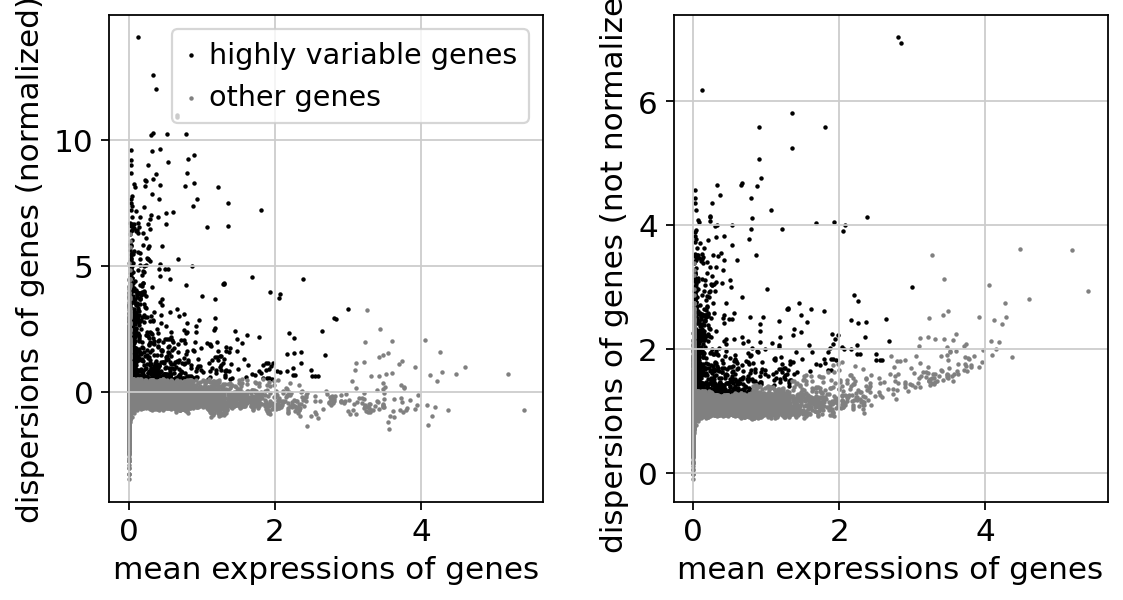

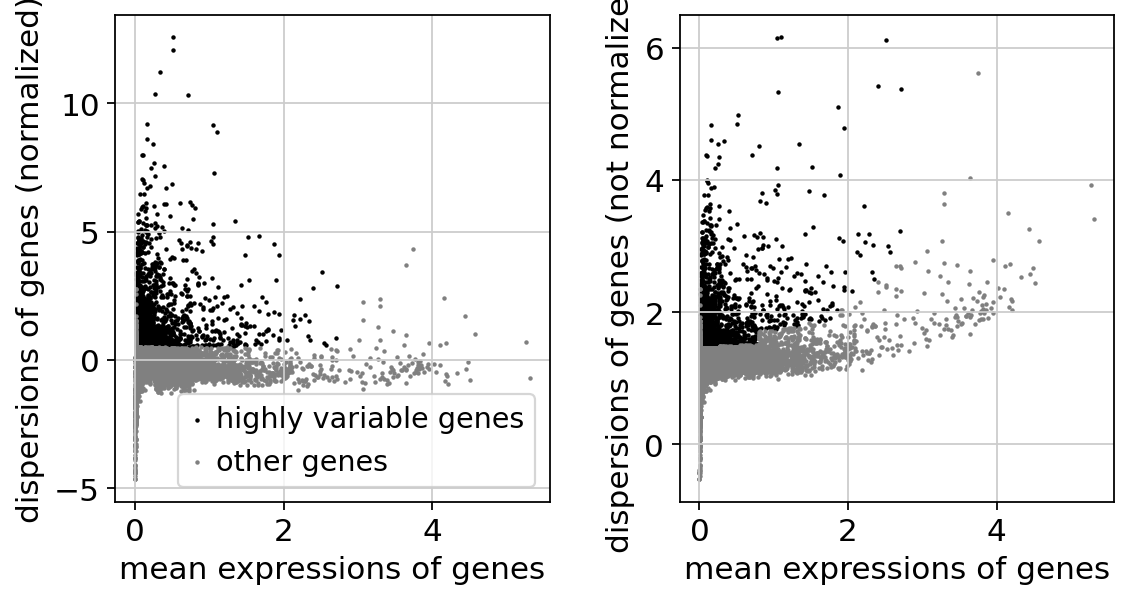

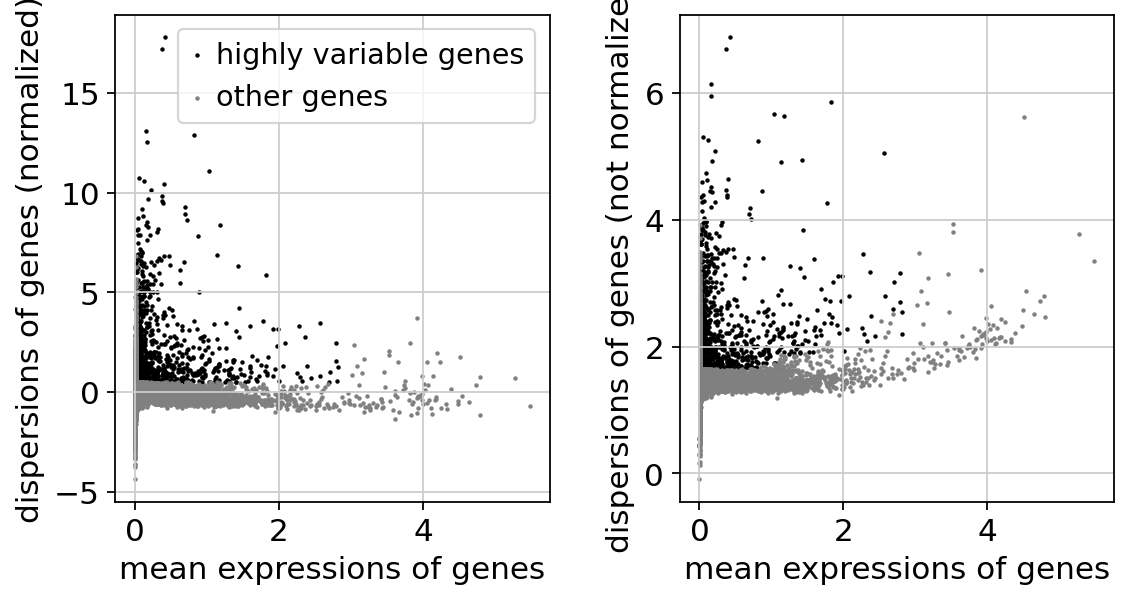

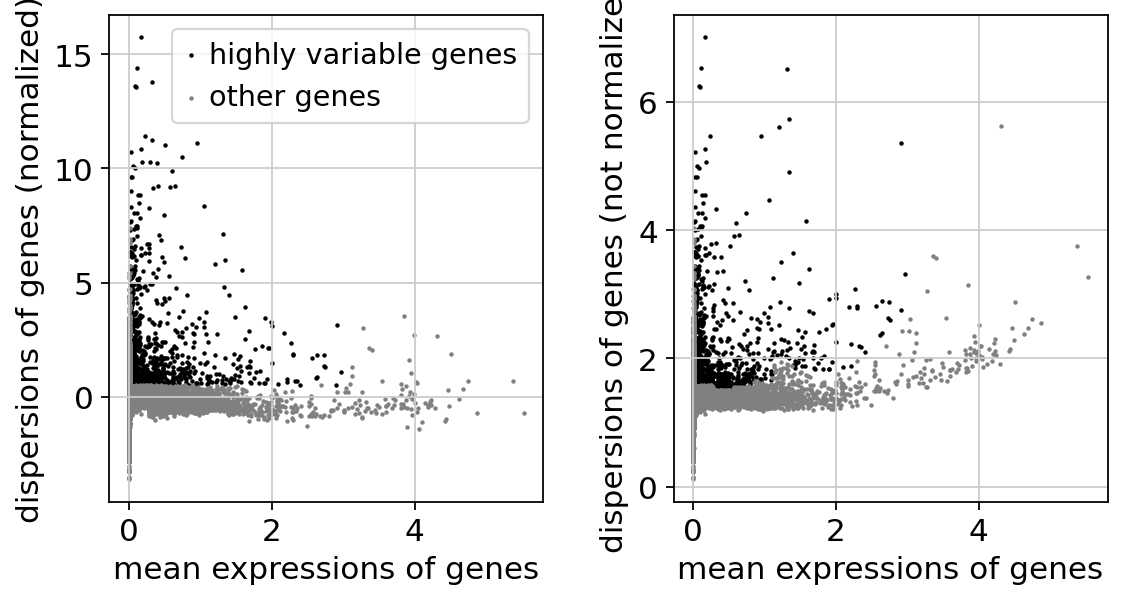

In [11]:
# Identify the most highly variable genes

sc.pp.highly_variable_genes(ko_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(wt1_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(wt2_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(wt3_data, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.pl.highly_variable_genes(ko_data)
sc.pl.highly_variable_genes(wt1_data)
sc.pl.highly_variable_genes(wt2_data)
sc.pl.highly_variable_genes(wt3_data)

In [12]:
#ko_seurat <- FindVariableFeatures(ko_seurat, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
#top10 <- head(VariableFeatures(ko_seurat), 10)

# Ploting these genes for ko

#plot1 <- VariableFeaturePlot(ko_seurat)
#plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
#plot1 + plot2

#wt1_seurat <- FindVariableFeatures(wt1_seurat, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
#top10 <- head(VariableFeatures(wt1_seurat), 10)

# Ploting these genes for wt1 
#plot1 <- VariableFeaturePlot(wt1_seurat)
#plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
#plot1 + plot2

#wt2_seurat <- FindVariableFeatures(wt2_seurat, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
#top10 <- head(VariableFeatures(wt2_seurat), 10)

# Ploting these genes for wt2 
#plot1 <- VariableFeaturePlot(wt2_seurat)
#plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
#plot1 + plot2

#wt3_seurat <- FindVariableFeatures(wt3_seurat, selection.method = "vst", nfeatures = 2000)

# Ploting these genes for wt3
#top10 <- head(VariableFeatures(wt3_seurat), 10)

# plot variable features with and without labels
#plot1 <- VariableFeaturePlot(wt3_seurat)
#plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
#plot1 + plot2


In [13]:
# Subset data according to highly variable genes and generate regress
ko_data.raw = ko_data
ko_data = ko_data[:, ko_data.var.highly_variable]
sc.pp.regress_out(ko_data, ["total_counts", "pct_counts_mt"])
sc.pp.scale(ko_data, max_value=10)

wt1_data.raw = wt1_data
wt1_data = wt1_data[:, wt1_data.var.highly_variable]
sc.pp.regress_out(wt1_data, ["total_counts", "pct_counts_mt"])
sc.pp.scale(wt1_data, max_value=10)

wt2_data.raw = wt2_data
wt2_data = wt2_data[:, wt2_data.var.highly_variable]
sc.pp.regress_out(wt2_data, ["total_counts", "pct_counts_mt"])
sc.pp.scale(wt2_data, max_value=10)

wt3_data.raw = wt3_data
wt3_data = wt3_data[:, wt3_data.var.highly_variable]
sc.pp.regress_out(wt3_data, ["total_counts", "pct_counts_mt"])
sc.pp.scale(wt3_data, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:12)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:03)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:10)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:16)


In [14]:
#Center and Scale all data according to gene names

#all.genes <- rownames(ko_seurat)
#ko_seurat <- ScaleData(ko_seurat, features = all.genes)

#all.genes <- rownames(wt1_seurat)
#wt1_seurat <- ScaleData(wt1_seurat, features = all.genes)

#all.genes <- rownames(wt2_seurat)
#wt2_seurat <- ScaleData(wt2_seurat, features = all.genes)

#all.genes <- rownames(wt2_seurat)
#wt2_seurat <- ScaleData(wt2_seurat, features = all.genes)

In [15]:
# Dimension reduction

sc.tl.pca(ko_data, svd_solver="arpack")
sc.tl.pca(wt1_data, svd_solver="arpack")
sc.tl.pca(wt2_data, svd_solver="arpack")
sc.tl.pca(wt3_data, svd_solver="arpack")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


In [16]:
# Observing PC clusters.

#ko_seurat <- RunPCA(ko_seurat, features = VariableFeatures(object = ko_seurat))
#wt1_seurat <- RunPCA(wt1_seurat, features = VariableFeatures(object = wt1_seurat))
#wt2_seurat <- RunPCA(wt2_seurat, features = VariableFeatures(object = wt2_seurat))

# Scale data
#wt3_seurat <- ScaleData(wt3_seurat)

# Perform PCA
#wt3_seurat <- RunPCA(wt3_seurat, features = VariableFeatures(object = wt3_seurat))

# Find nearest neighbors
#wt3_seurat <- FindNeighbors(wt3_seurat, dims = 1:10)

# Find clusters
#wt3_seurat <- FindClusters(wt3_seurat, resolution = 0.5)

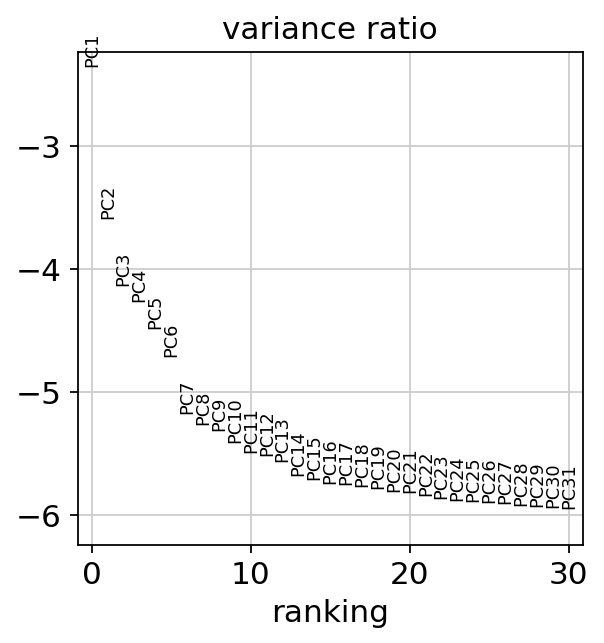

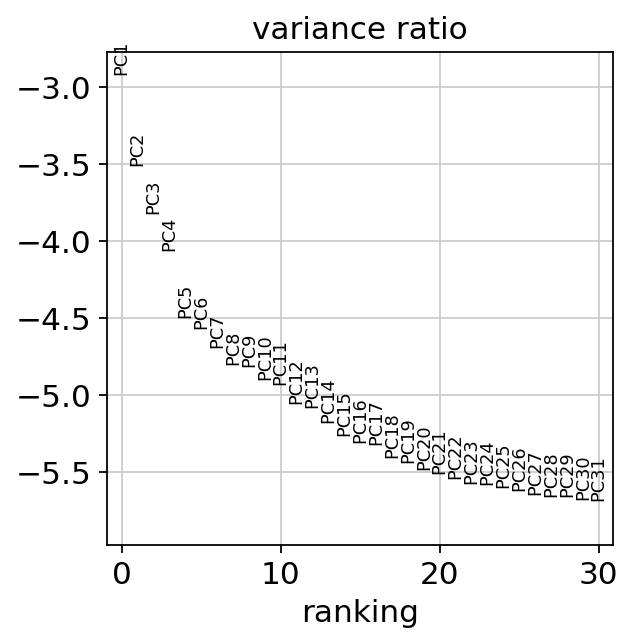

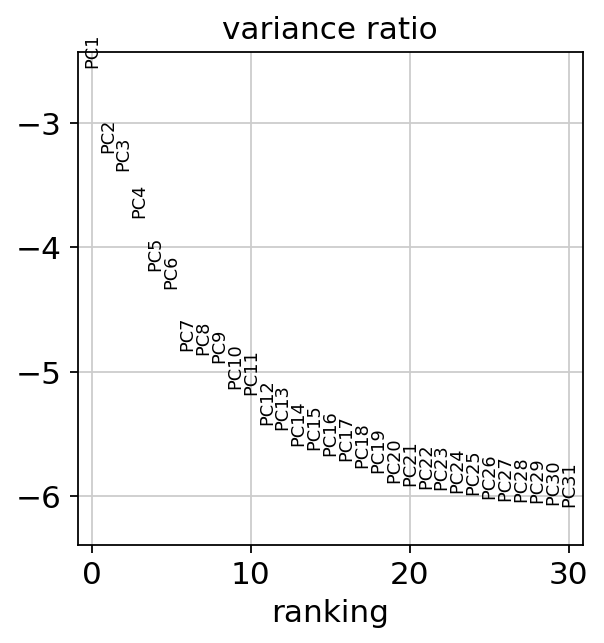

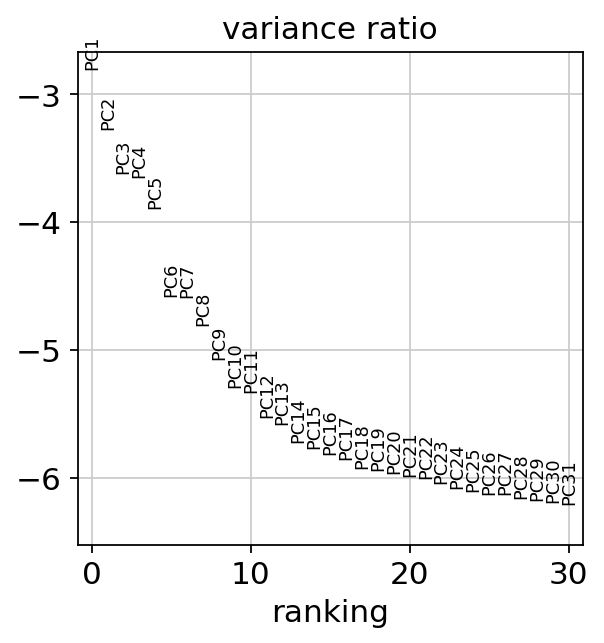

In [17]:
# Observing PC clusters.

sc.pl.pca_variance_ratio(ko_data, log = True)
sc.pl.pca_variance_ratio(wt1_data, log = True)
sc.pl.pca_variance_ratio(wt2_data, log = True)
sc.pl.pca_variance_ratio(wt3_data, log = True)

In [18]:
# Visualizing PC flatten, to decide n_pcs

#ko_seurat <- JackStraw(ko_seurat, num.replicate = 100)
#ko_seurat <- ScoreJackStraw(ko_seurat, dims = 1:20)

#wt1_seurat <- JackStraw(wt1_seurat, num.replicate = 100)
#wt1_seurat <- ScoreJackStraw(wt1_seurat, dims = 1:20)

#wt2_seurat <- JackStraw(wt2_seurat, num.replicate = 100)
#wt2_seurat <- ScoreJackStraw(wt2_seurat, dims = 1:20)

#wt3_seurat <- JackStraw(wt3_seurat, num.replicate = 100)
#wt3_seurat <- ScoreJackStraw(wt3_seurat, dims = 1:20)

#JackStrawPlot(ko_seurat, dims = 1:15)
#JackStrawPlot(wt1_seurat, dims = 1:15)
#JackStrawPlot(wt2_seurat, dims = 1:15)
#JackStrawPlot(wt3_seurat, dims = 1:15)

In [19]:
# Deciding PC where the curve gets flatten to find n_pcs value

sc.pp.neighbors(ko_data, n_neighbors=10, n_pcs=20)
sc.pp.neighbors(wt1_data, n_neighbors=10, n_pcs=20)
sc.pp.neighbors(wt2_data, n_neighbors=10, n_pcs=20)
sc.pp.neighbors(wt3_data, n_neighbors=10, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


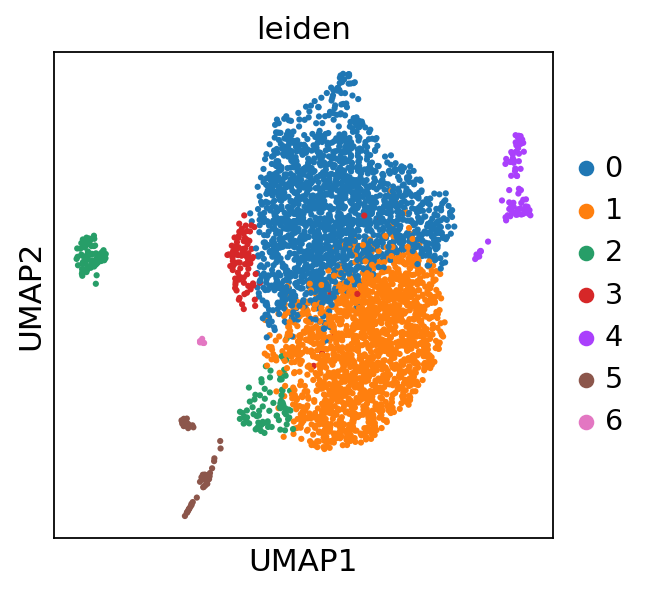

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


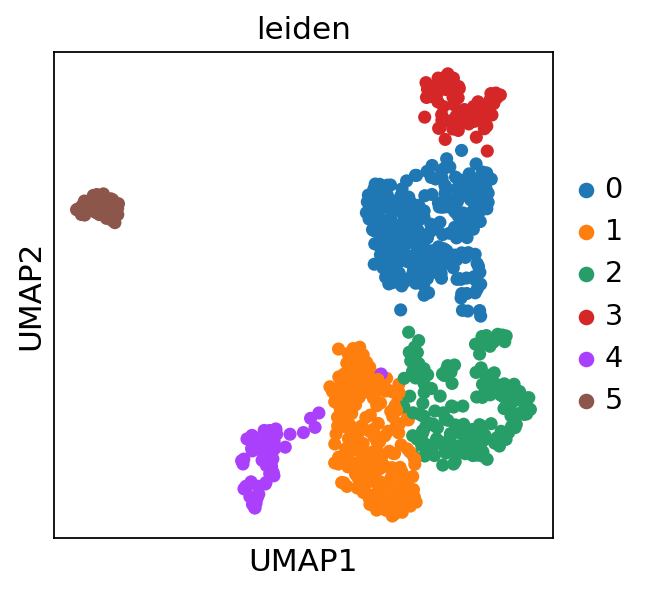

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


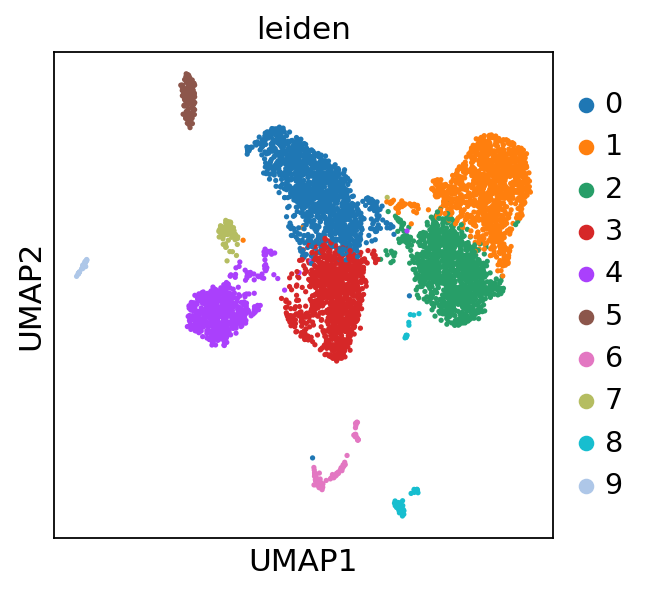

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


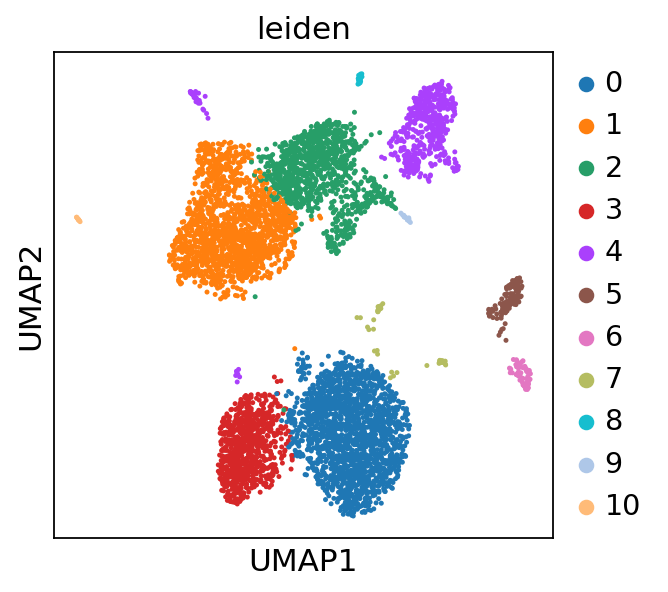

In [20]:
# UMAP Clustering cells with proper resolution to visualize less but larger clusters.

sc.tl.umap(ko_data)
sc.tl.umap(wt1_data)
sc.tl.umap(wt2_data)
sc.tl.umap(wt3_data)
sc.tl.leiden(ko_data, resolution=0.25)
sc.tl.leiden(wt1_data, resolution=0.25)
sc.tl.leiden(wt2_data, resolution=0.25)
sc.tl.leiden(wt3_data, resolution=0.25)


sc.pl.umap(ko_data, color=["leiden"])
sc.pl.umap(wt1_data, color=["leiden"])
sc.pl.umap(wt2_data, color=["leiden"])
sc.pl.umap(wt3_data, color=["leiden"])



In [21]:
# UMAP Clustering

#ko_seurat <- RunUMAP(ko_seurat, dims = 1:10)
#wt1_seurat <- RunUMAP(wt1_seurat, dims = 1:10)
#wt2_seurat <- RunUMAP(wt2_seurat, dims = 1:10)
#wt3_seurat <- RunUMAP(wt3_seurat, dims = 1:10)

#DimPlot(ko_seurat, reduction = "umap")
#DimPlot(wt1_seurat, reduction = "umap")
#DimPlot(wt2_seurat, reduction = "umap")
#DimPlot(wt3_seurat, reduction = "umap")

In [22]:
# Ranking genes, creating an array to store relevant data to visualize top expressed genes.

sc.tl.rank_genes_groups(ko_data, "leiden", method="wilcoxon")
sc.tl.rank_genes_groups(wt1_data, "leiden", method="wilcoxon")
sc.tl.rank_genes_groups(wt2_data, "leiden", method="wilcoxon")
sc.tl.rank_genes_groups(wt3_data, "leiden", method="wilcoxon")

result_ko = ko_data.uns['rank_genes_groups']
result_wt1 = wt1_data.uns['rank_genes_groups']
result_wt2 = wt2_data.uns['rank_genes_groups']
result_wt3 = wt3_data.uns['rank_genes_groups']

groups_ko = result_ko['names'].dtype.names
groups_wt1 = result_wt1['names'].dtype.names
groups_wt2 = result_wt2['names'].dtype.names
groups_wt3 = result_wt3['names'].dtype.names

out_ko = np.array([[0,0,0,0,0]])
out_wt1 = np.array([[0,0,0,0,0]])
out_wt2 = np.array([[0,0,0,0,0]])
out_wt3 = np.array([[0,0,0,0,0]])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be i

In [23]:
# Iterate through those data and make marker object. 


for group in groups_ko:
    out_ko = np.vstack((out_ko, np.vstack((result_ko['names'][group],
                                        result_ko['scores'][group],
                                        result_ko['pvals_adj'][group],
                                        result_ko['logfoldchanges'][group],
                                        np.array([group] * len(result_ko['names'][group])).astype('object'))).T))
    
for group in groups_wt1:
    out_wt1 = np.vstack((out_wt1, np.vstack((result_wt1['names'][group],
                                        result_wt1['scores'][group],
                                        result_wt1['pvals_adj'][group],
                                        result_wt1['logfoldchanges'][group],
                                        np.array([group] * len(result_wt1['names'][group])).astype('object'))).T))
                                        
for group in groups_wt2:
    out_wt2 = np.vstack((out_wt2, np.vstack((result_wt2['names'][group],
                                        result_wt2['scores'][group],
                                        result_wt2['pvals_adj'][group],
                                        result_wt2['logfoldchanges'][group],
                                        np.array([group] * len(result_wt2['names'][group])).astype('object'))).T))
                                        
for group in groups_wt3:
    out_wt3 = np.vstack((out_wt3, np.vstack((result_wt3['names'][group],
                                        result_wt3['scores'][group],
                                        result_wt3['pvals_adj'][group],
                                        result_wt3['logfoldchanges'][group],
                                        np.array([group] * len(result_wt3['names'][group])).astype('object'))).T))

marker_ko = pd.DataFrame(out_ko[1:], columns = ['Gene', 'Scores', 'padj', 'lfc', 'cluster'])
marker_wt1 = pd.DataFrame(out_wt1[1:], columns = ['Gene', 'Scores', 'padj', 'lfc', 'cluster'])
marker_wt2 = pd.DataFrame(out_wt2[1:], columns = ['Gene', 'Scores', 'padj', 'lfc', 'cluster'])
marker_wt3 = pd.DataFrame(out_wt3[1:], columns = ['Gene', 'Scores', 'padj', 'lfc', 'cluster'])

In [24]:
# Sort the marker table by a scores and find highly expressed genes
sorted_markers = marker_ko.sort_values(by='Scores', ascending=False)
top_marker = sorted_markers.head(30)
print(top_marker)

sorted_markers = marker_wt1.sort_values(by='Scores', ascending=False)
top_marker = sorted_markers.head(30)
print(top_marker)

sorted_markers = marker_wt2.sort_values(by='Scores', ascending=False)
top_marker = sorted_markers.head(30)
print(top_marker)

sorted_markers = marker_wt3.sort_values(by='Scores', ascending=False)
top_marker = sorted_markers.head(30)
print(top_marker)

             Gene     Scores padj       lfc cluster
0          Nfkbia   25.31728  0.0  1.416169       0
1            Jund  22.014925  0.0  0.823525       0
2            Junb  19.511019  0.0  0.913152       0
3         Bcl2a1b  19.493412  0.0  1.247404       0
4            Pim1  18.790668  0.0  1.062293       0
5         Tnfaip3  18.106359  0.0  0.994075       0
6           Il17a  17.633348  0.0  2.325305       0
7           Furin  16.770237  0.0  1.225359       0
14155     mt-Cytb  16.731848  0.0  0.543552       1
14156     mt-Atp6  16.189808  0.0  0.412133       1
8           Kdm6b  16.037735  0.0  1.344492       0
9         Bcl2a1d  15.951738  0.0  1.211678       0
10     AC163354.1  15.891541  0.0  0.969342       0
11           Icos  15.783309  0.0  0.896192       0
12          Traf1  15.754251  0.0  1.173699       0
14157      mt-Co3  15.441649  0.0  0.383188       1
13           Cd69  15.426037  0.0  0.928261       0
42465         Fos  15.257737  0.0  4.967828       3
14158      m

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


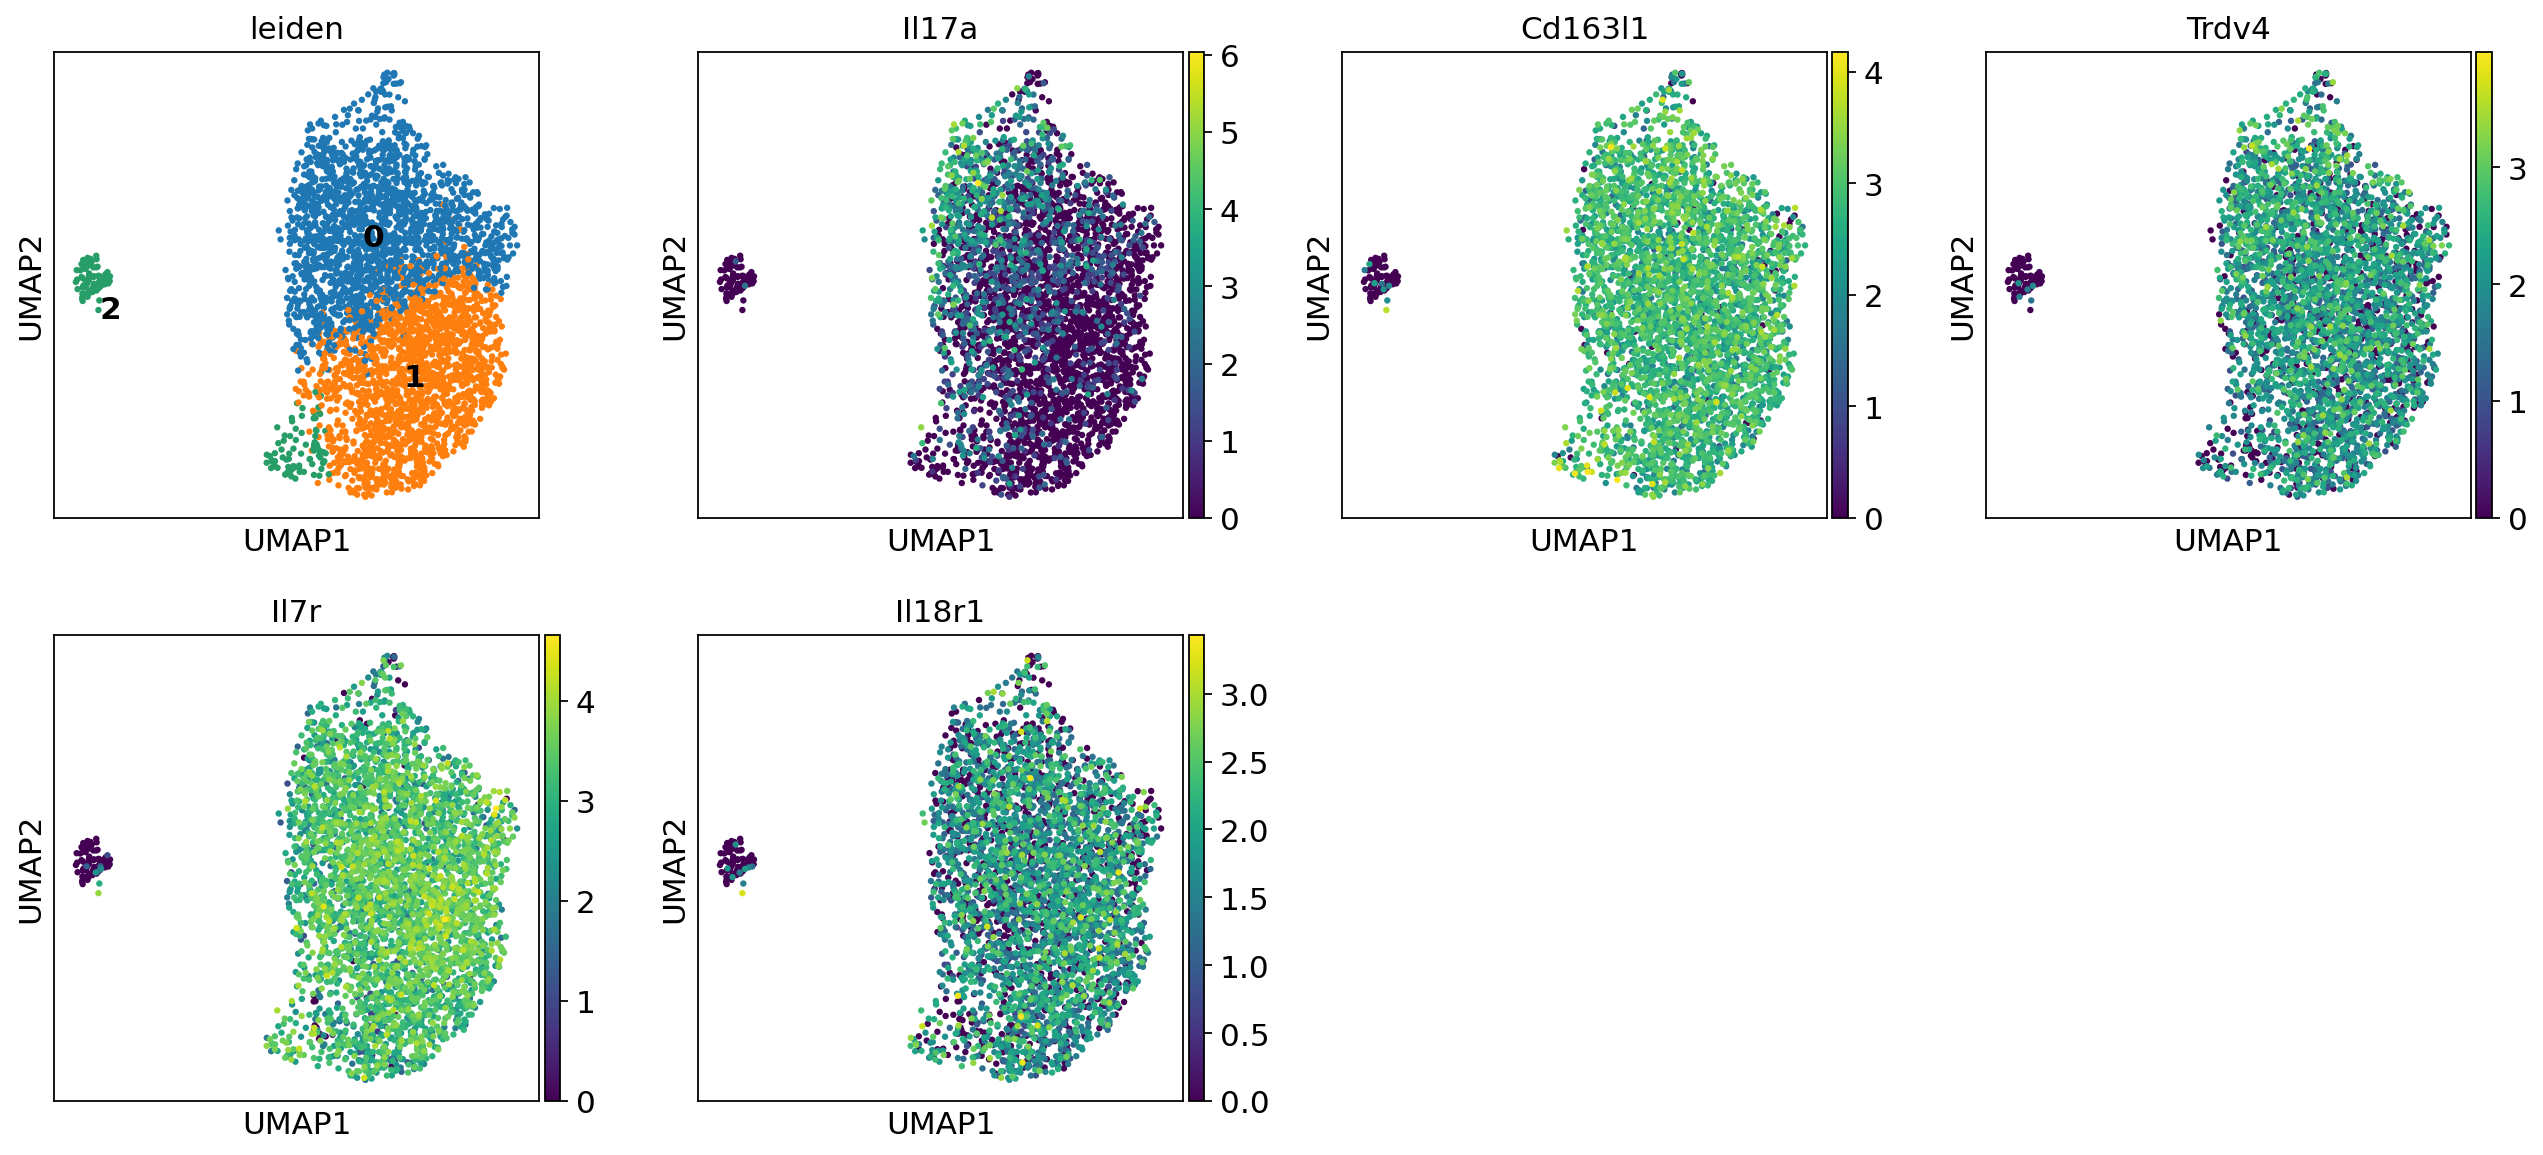

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


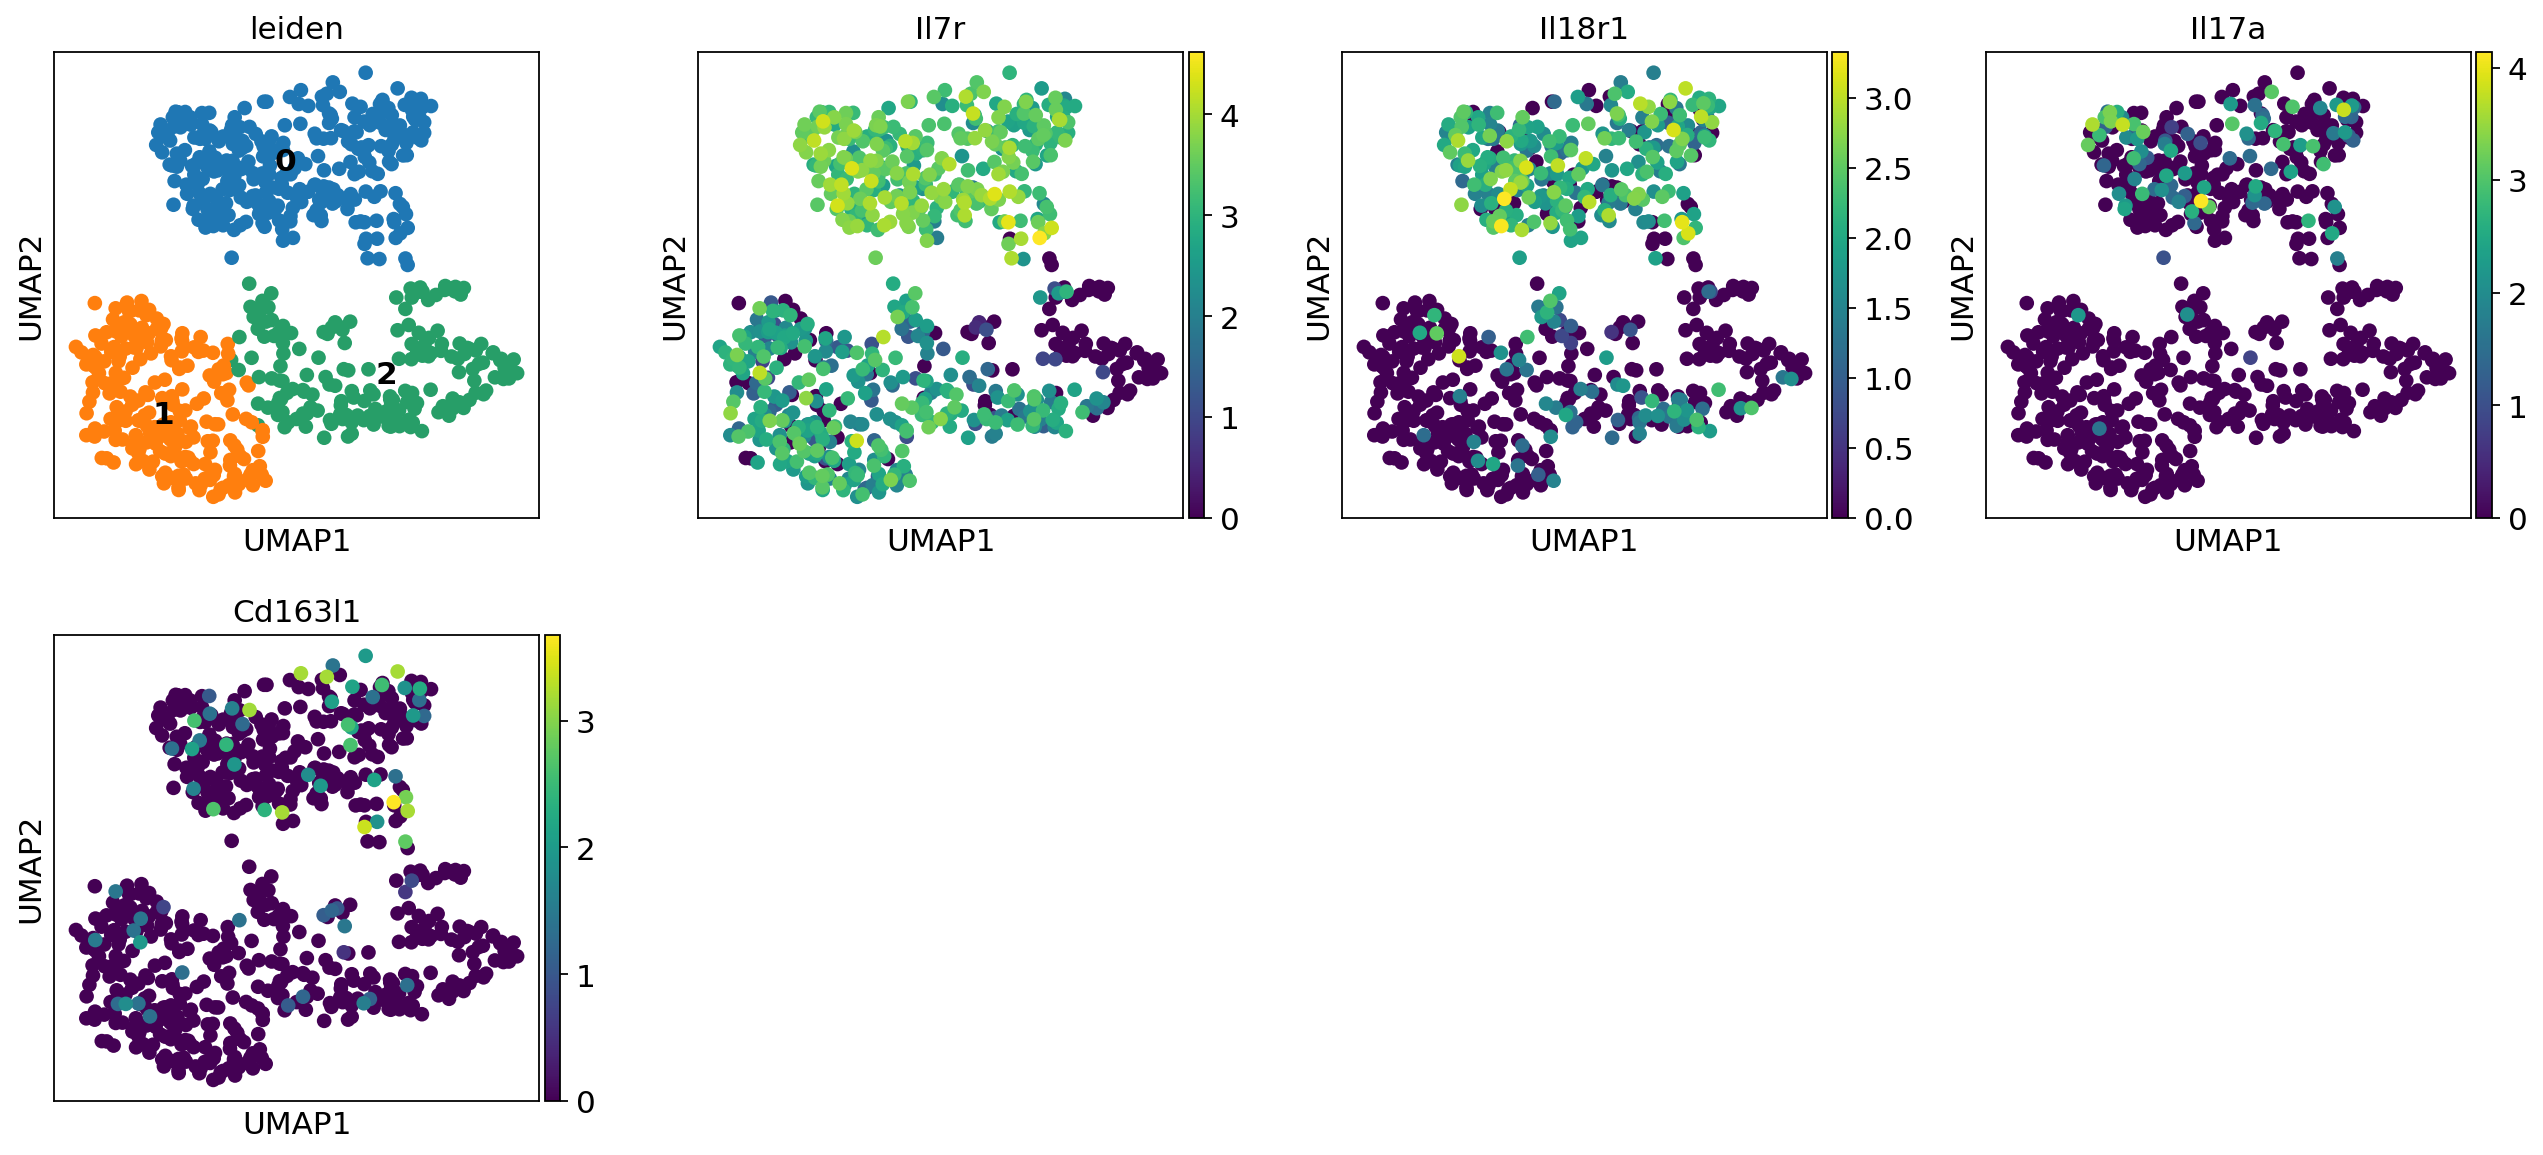

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


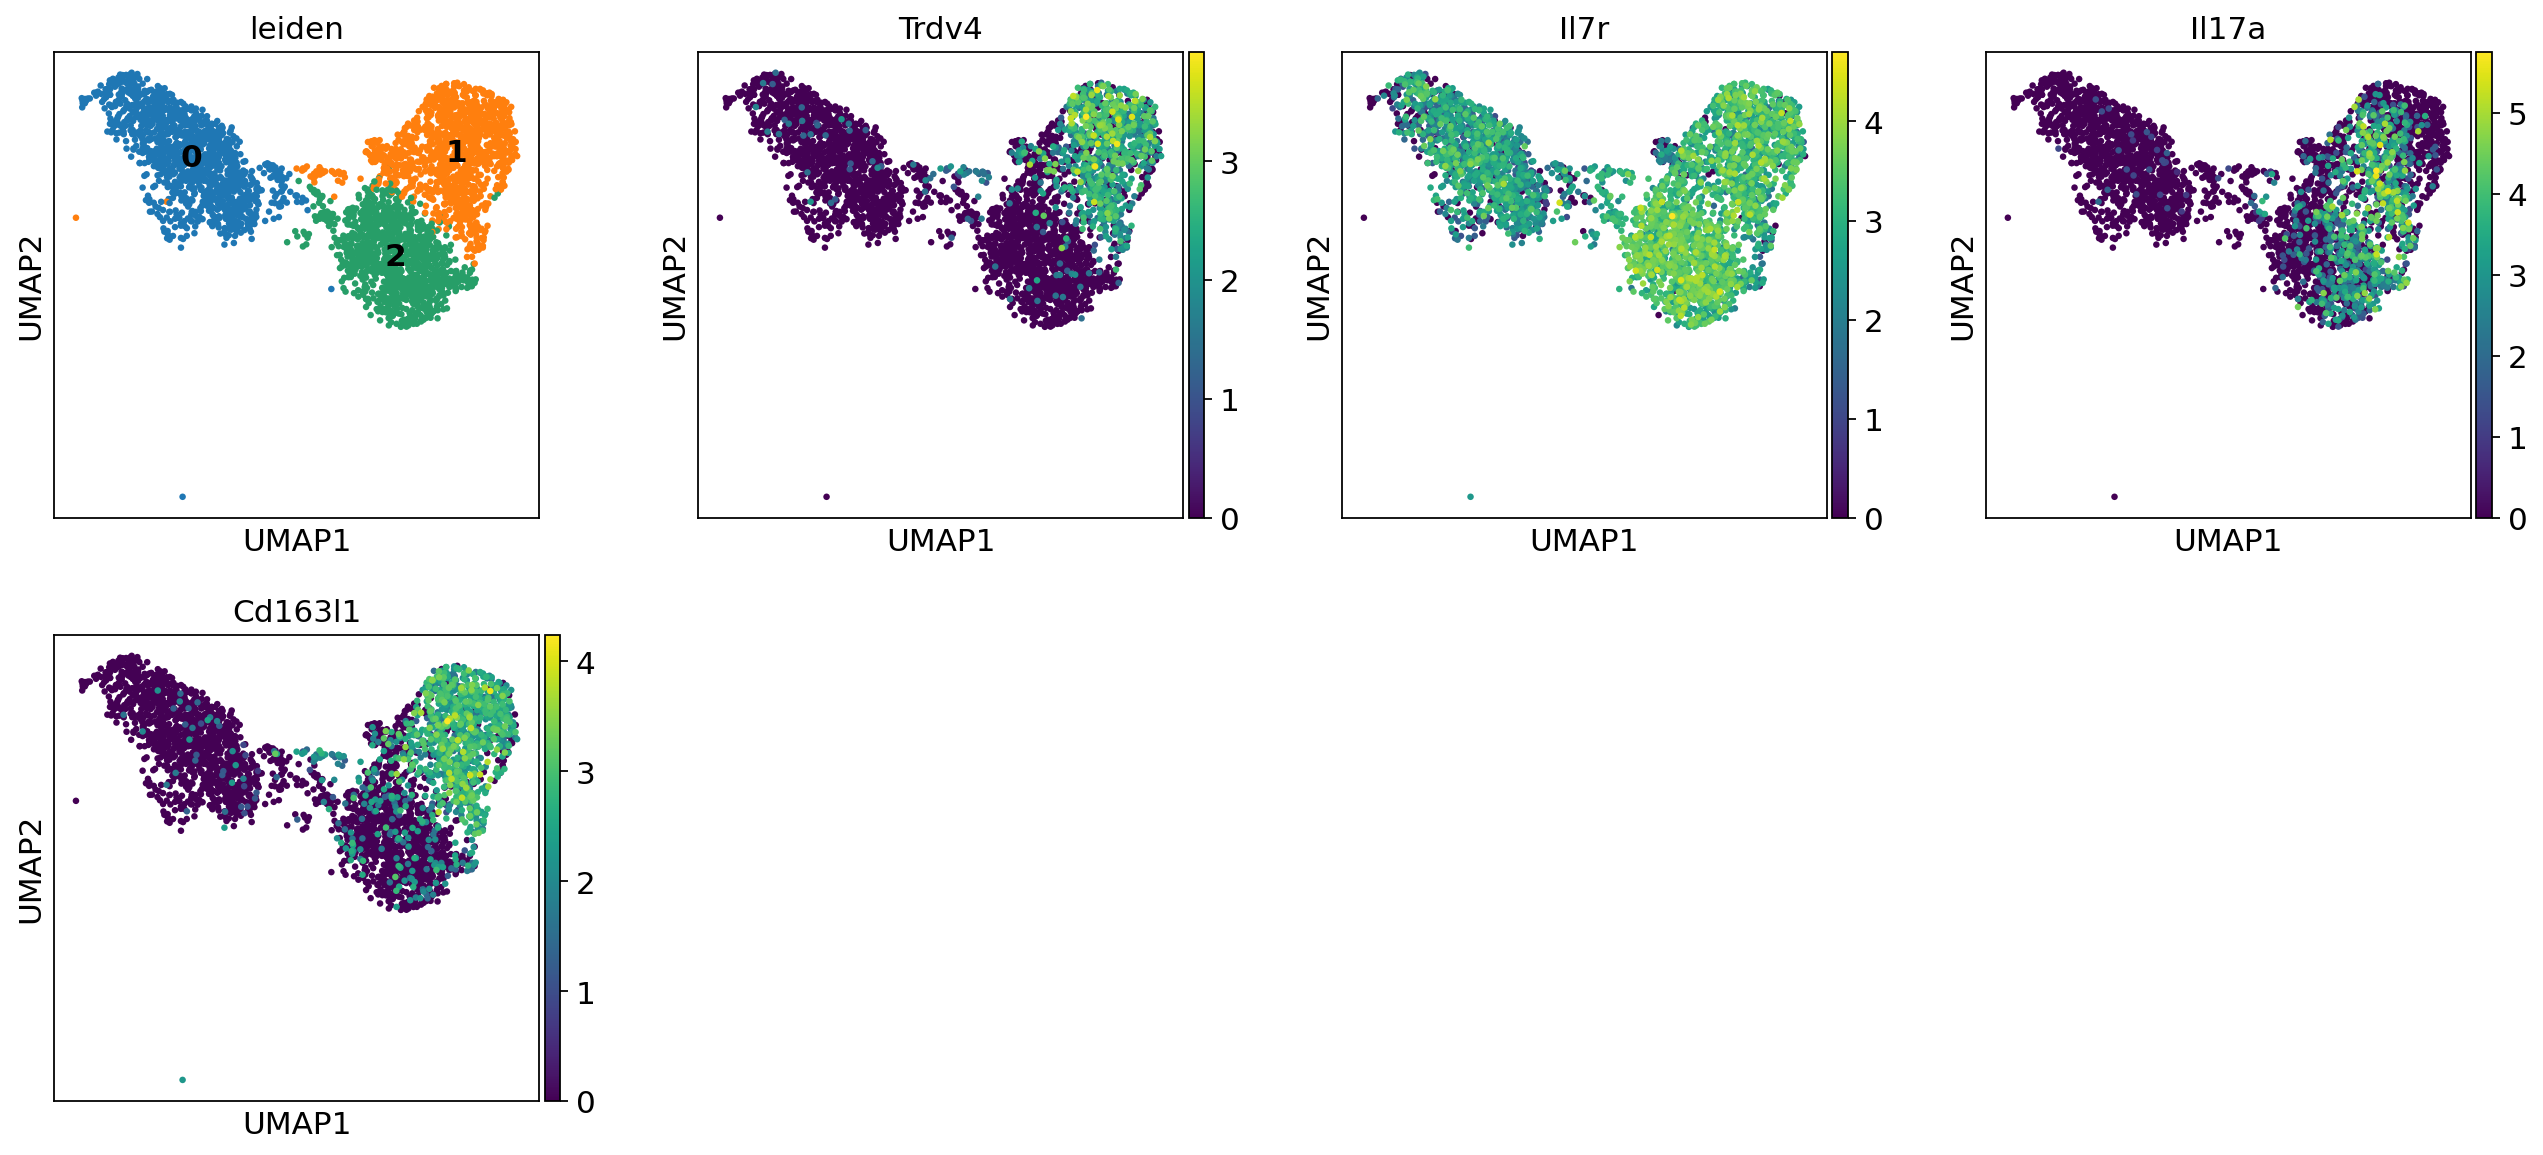

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


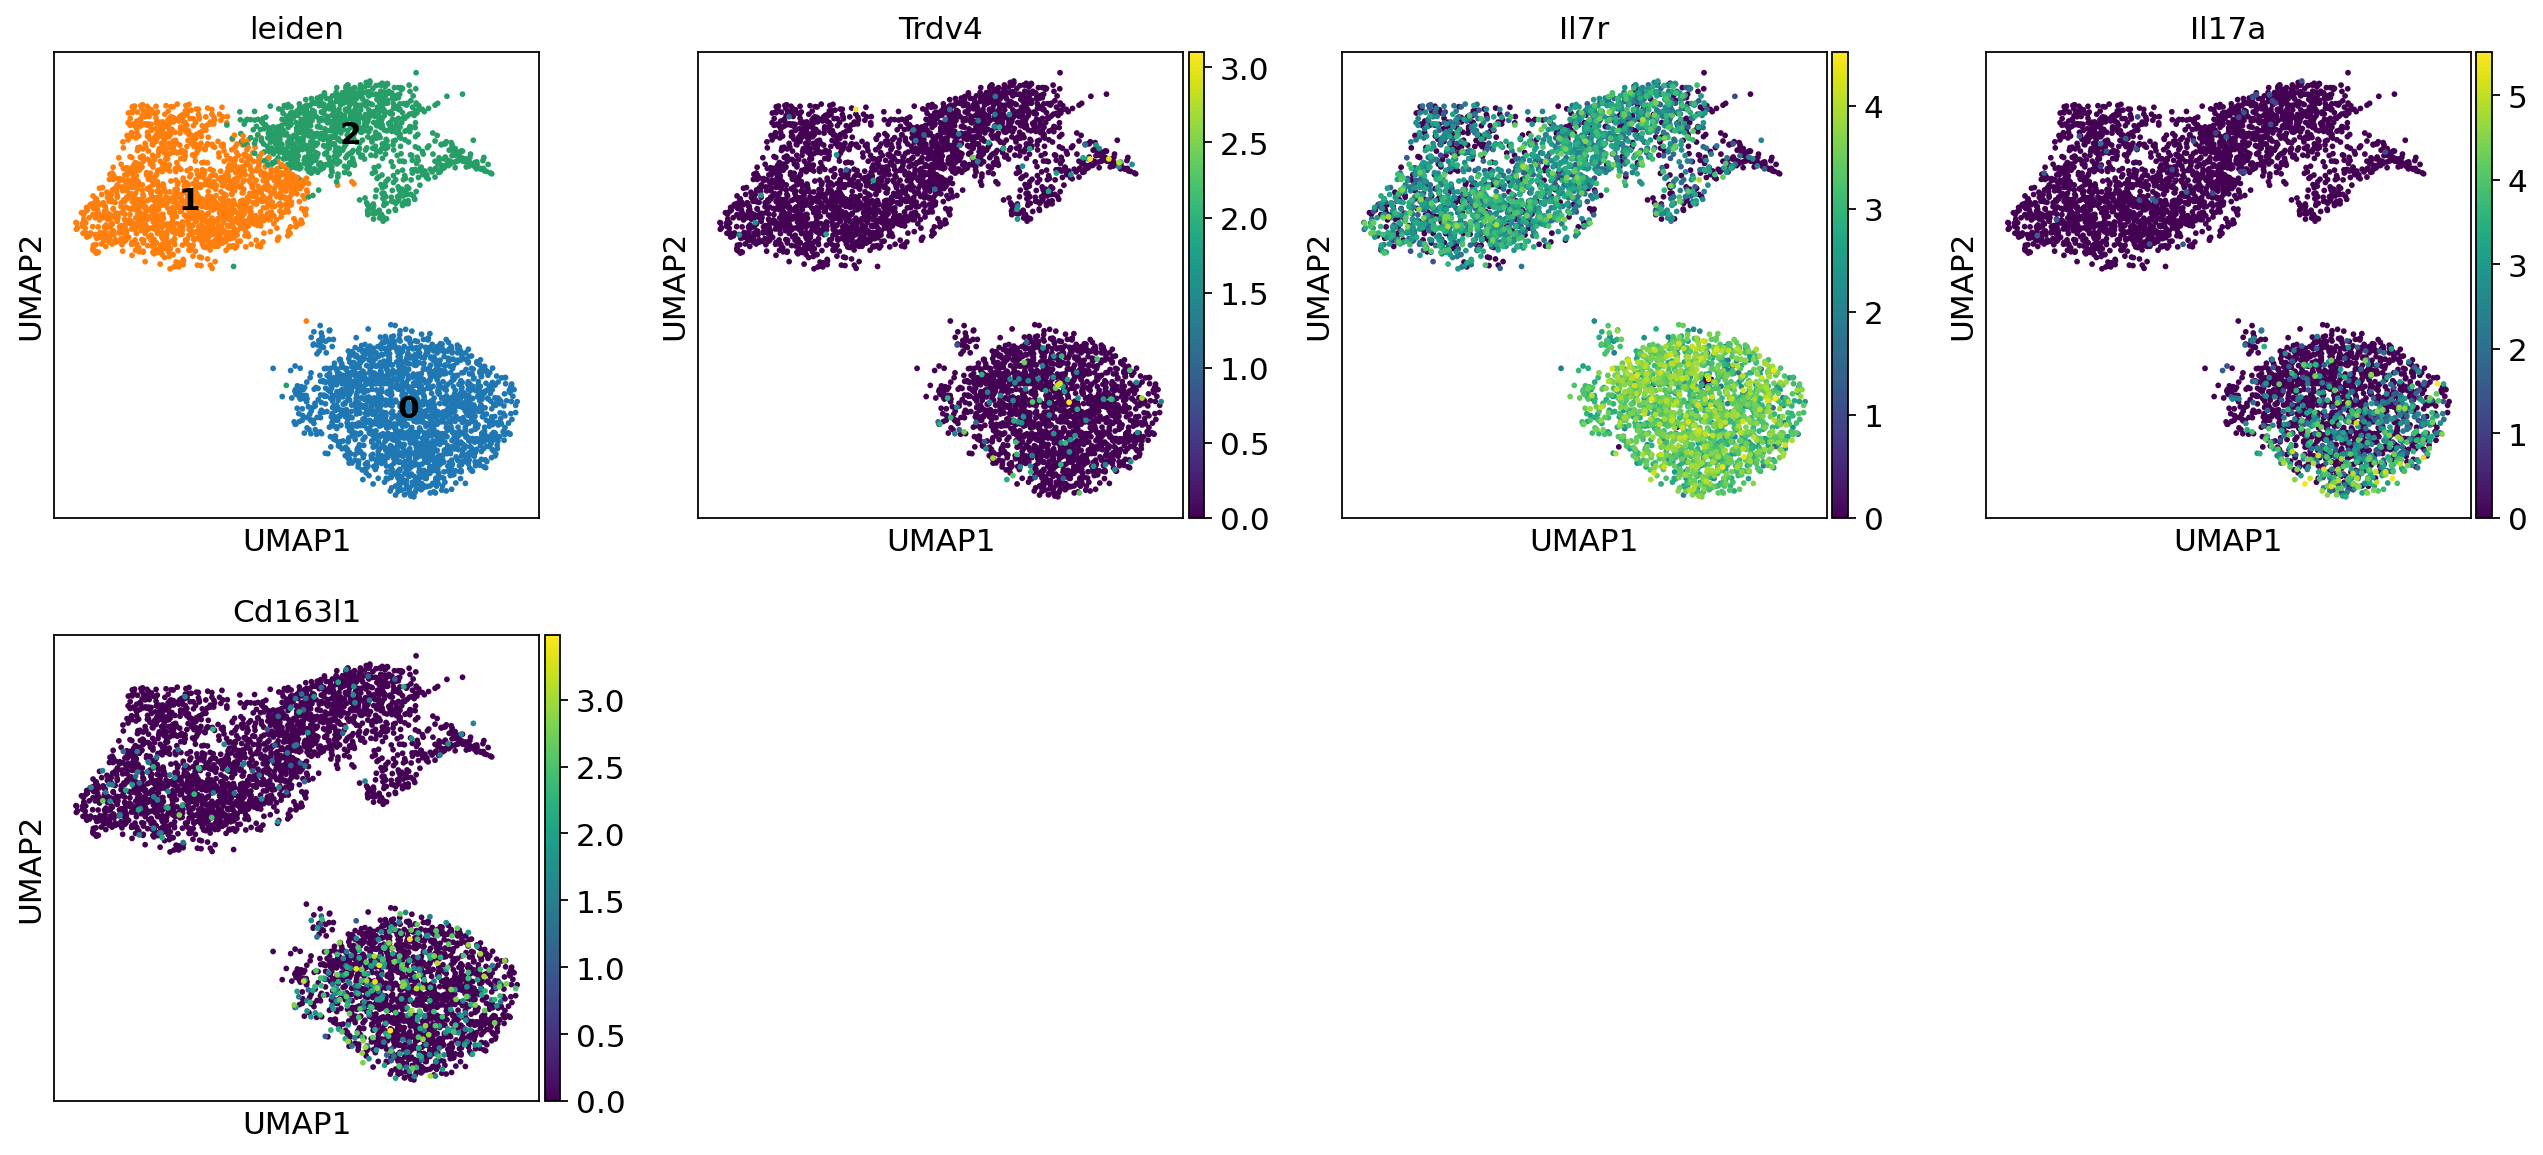

In [25]:
# Finding largest 3 clusters and Exclude small clusters that might be noise and are not γδ T cells and visualize them via UMAP

cluster_sizes = ko_data.obs['leiden'].value_counts()
largest_clusters = cluster_sizes.nlargest(3).index.intersection(cluster_sizes[cluster_sizes >= 100].index)
ko_data_largest_clusters = ko_data[ko_data.obs['leiden'].isin(largest_clusters)]
sc.pl.umap(ko_data_largest_clusters, color=['leiden', 'Il17a', 'Cd163l1', 'Trdv4', 'Il7r', 'Il18r1'], legend_loc='on data')

cluster_sizes = wt1_data.obs['leiden'].value_counts()
largest_clusters = cluster_sizes.nlargest(3).index.intersection(cluster_sizes[cluster_sizes >= 100].index)
wt1_data_largest_clusters = wt1_data[wt1_data.obs['leiden'].isin(largest_clusters)]
sc.pl.umap(wt1_data_largest_clusters, color=['leiden', 'Il7r', 'Il18r1', 'Il17a', 'Cd163l1'], legend_loc='on data')

cluster_sizes = wt2_data.obs['leiden'].value_counts()
largest_clusters = cluster_sizes.nlargest(3).index.intersection(cluster_sizes[cluster_sizes >= 100].index)
wt2_data_largest_clusters = wt2_data[wt2_data.obs['leiden'].isin(largest_clusters)]
sc.pl.umap(wt2_data_largest_clusters, color=['leiden', 'Trdv4', 'Il7r', 'Il17a', 'Cd163l1'], legend_loc='on data')

cluster_sizes = wt3_data.obs['leiden'].value_counts()
largest_clusters = cluster_sizes.nlargest(3).index.intersection(cluster_sizes[cluster_sizes >= 100].index)
wt3_data_largest_clusters = wt3_data[wt3_data.obs['leiden'].isin(largest_clusters)]
sc.pl.umap(wt3_data_largest_clusters, color=['leiden','Trdv4','Il7r', 'Il17a', 'Cd163l1'], legend_loc='on data')

In [26]:
# Finding largest 3 clusters and Exclude small clusters that might be noise and are not γδ T cells and visualize them via UMAP

#cluster5.markers <- FindMarkers(ko_seurat, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
#cluster5.markers <- FindMarkers(wt1_seurat, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
#cluster5.markers <- FindMarkers(wt2_seurat, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
#cluster5.markers <- FindMarkers(wt3_seurat, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)

#library(magrittr)
#library(dplyr)

#ko_seurat.markers <- FindAllMarkers(ko_seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
#ko_seurat.markers <- ko_seurat.markers %>%
#    group_by(cluster) %>%
#    dplyr::slice_max(n = 2, order_by = avg_log2FC)

#wt1_seurat.markers <- FindAllMarkers(wt1_seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
#wt1_seurat.markers <- wt1_seurat.markers %>%
#    group_by(cluster) %>%
#    dplyr::slice_max(n = 2, order_by = avg_log2FC)

#wt2_seurat.markers <- FindAllMarkers(wt2_seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
#wt2_seurat.markers <- wt2_seurat.markers %>%
#    group_by(cluster) %>%
#    dplyr::slice_max(n = 2, order_by = avg_log2FC)

#wt3_seurat.markers <- FindAllMarkers(wt3_seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
#wt3_seurat.markers <- wt3_seurat.markers %>%
#    group_by(cluster) %>%
#    dplyr::slice_max(n = 2, order_by = avg_log2FC)


#FeaturePlot(ko_seurat, features = c("Il17a", "Cd163l1", "Trdv4", "Il7r", "Il18r1"))
#FeaturePlot(wt1_seurat, features = c("Il7r", "Il18r1", "Il17a", "Cd163l1"))
#FeaturePlot(wt2_seurat, features = c("Trdv4", "Il7r", "Il17a", "Cd163l1"))
#FeaturePlot(wt3_seurat, features = c("Trdv4", "Il7r", "Il17a", "Cd163l1"))

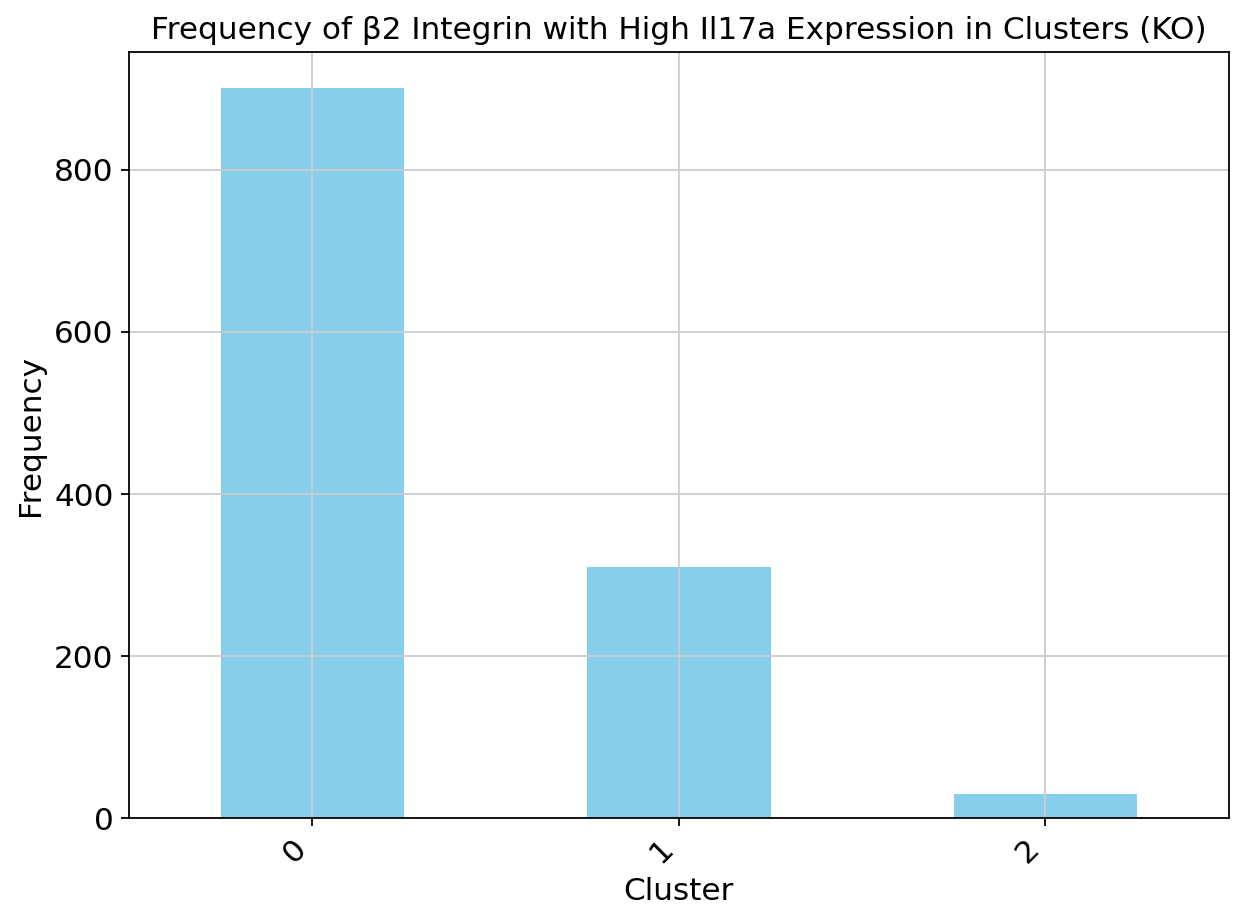

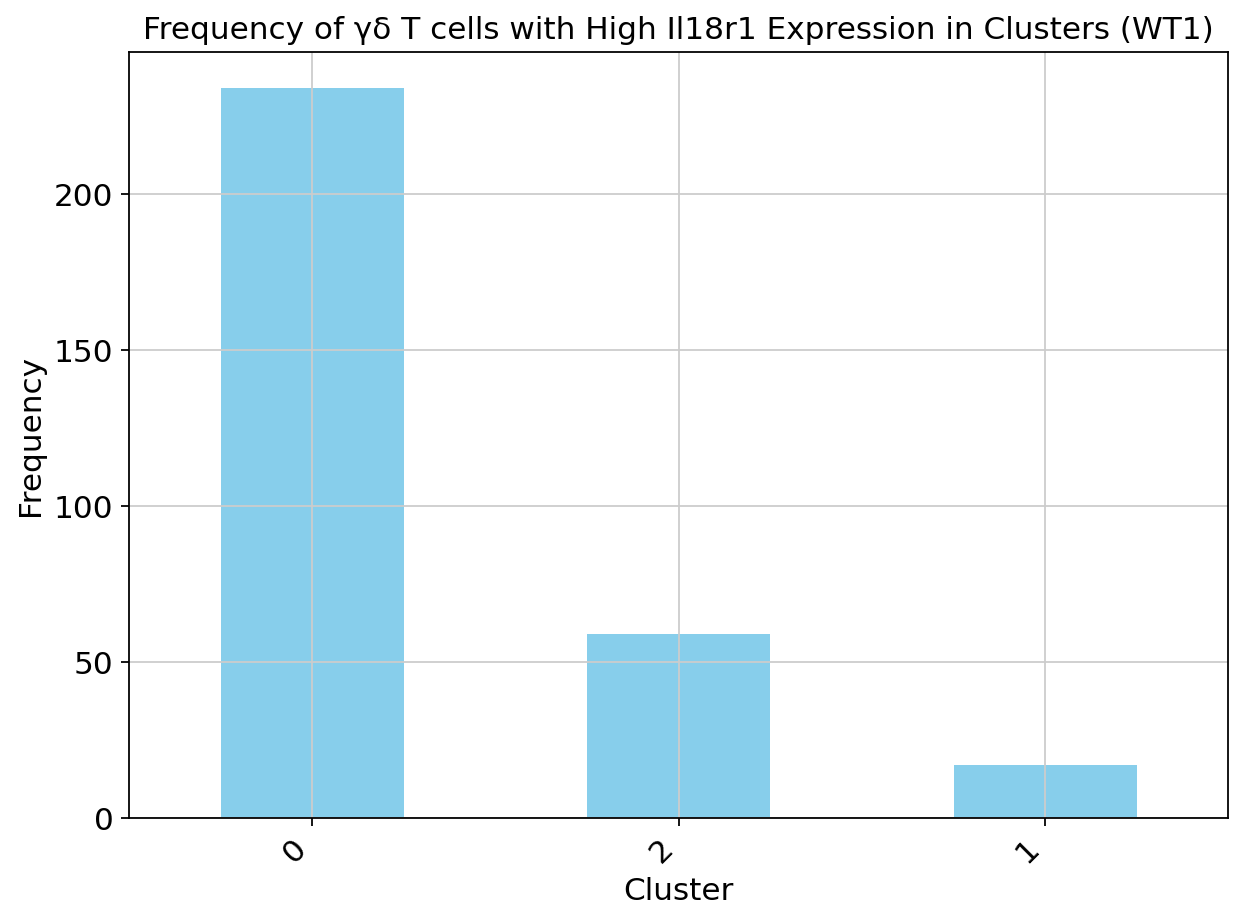

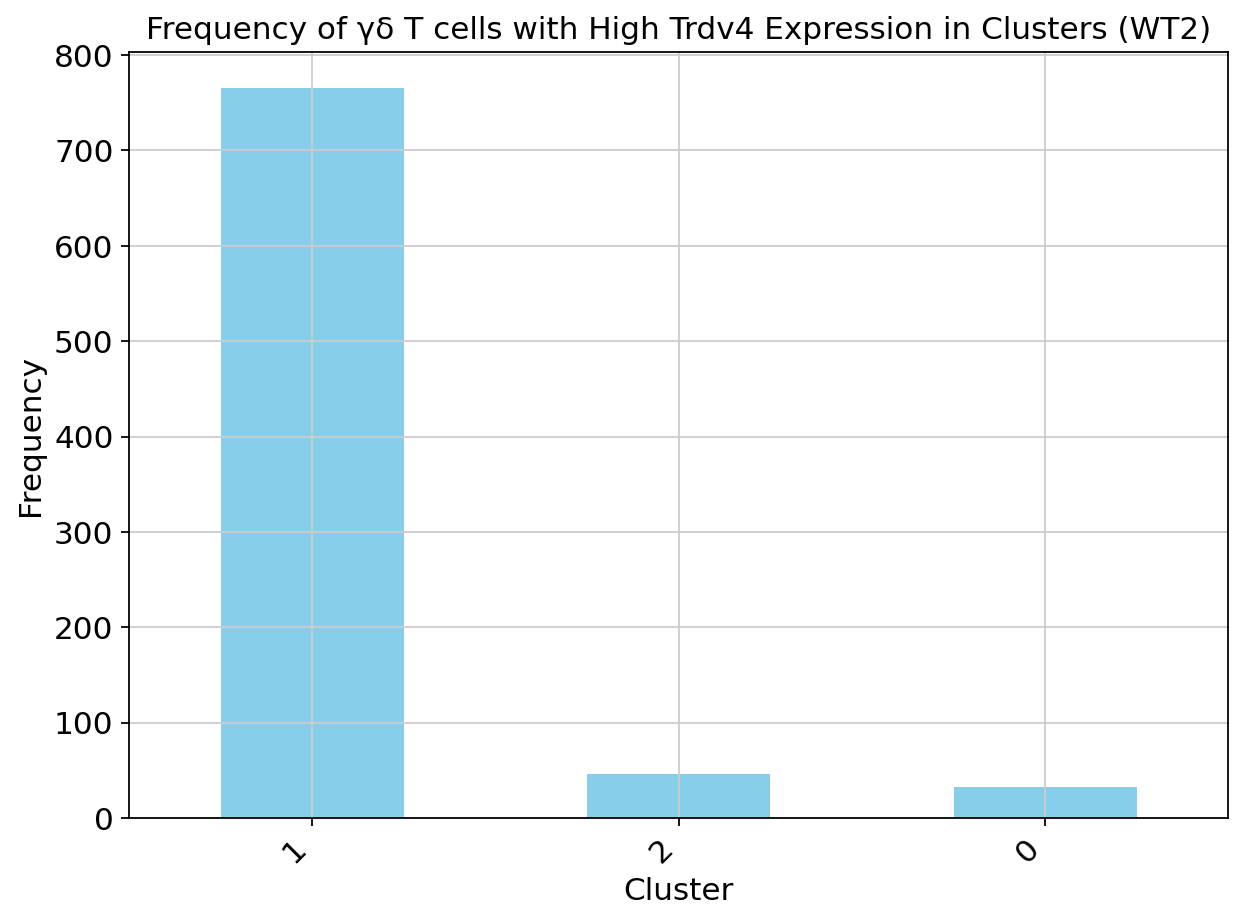

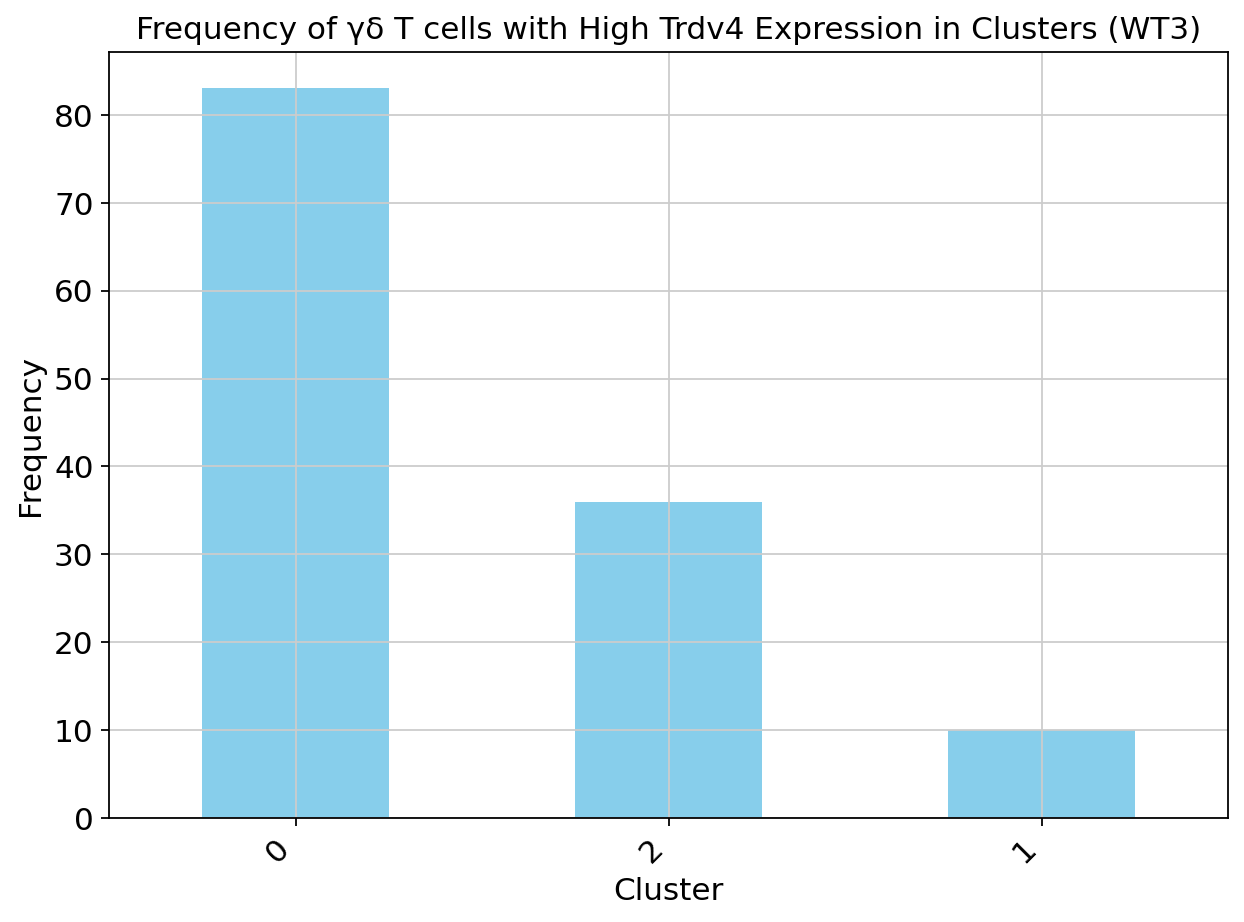

In [27]:
genes = ko_data_largest_clusters.var_names
il17a_index = genes.get_loc('Il17a')
il17a_expression = ko_data_largest_clusters[:, il17a_index].X
# Determine a threshold for 'Il17a' expression to consider
threshold = 0.0001  
# Find cells with 'Il17a' expression above the threshold
cells_with_il17a = il17a_expression > threshold
if cells_with_il17a.sum() > 0:
    # Filter ko_data_largest_clusters for cells with high 'Il17a' expression
    ko_data_high_il17a = ko_data_largest_clusters[cells_with_il17a]

# Calculate the frequency of each cell type in the clusters
cluster_freq = ko_data_high_il17a.obs['leiden'].value_counts()

# Plot the frequency of cell types in the clusters
plt.figure(figsize=(8, 6))
cluster_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency of β2 Integrin with High Il17a Expression in Clusters (KO)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

genes = wt1_data_largest_clusters.var_names
Il18r1_index = genes.get_loc('Il18r1')
Il18r1_expression = wt1_data_largest_clusters[:, Il18r1_index].X
# Determine a threshold for 'Il17a' expression to consider
threshold = 0.0001    
# Find cells with 'Il17a' expression above the threshold
cells_with_Il18r1 = Il18r1_expression > threshold
if cells_with_Il18r1.sum() > 0:
    # Filter ko_data_largest_clusters for cells with high 'Il17a' expression
    wt1_data_high_Il18r1 = wt1_data_largest_clusters[cells_with_Il18r1]

# Calculate the frequency of each cell type in the clusters
cluster_freq = wt1_data_high_Il18r1.obs['leiden'].value_counts()

# Plot the frequency of cell types in the clusters
plt.figure(figsize=(8, 6))
cluster_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency of γδ T cells with High Il18r1 Expression in Clusters (WT1)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

genes = wt2_data_largest_clusters.var_names
Trdv4_index = genes.get_loc('Trdv4')
Trdv4_expression = wt2_data_largest_clusters[:, Trdv4_index].X
# Determine a threshold for 'Il17a' expression to consider
threshold = 0.0001   
# Find cells with 'Il17a' expression above the threshold
cells_with_Trdv4 = Trdv4_expression > threshold
if cells_with_Trdv4.sum() > 0:
    # Filter ko_data_largest_clusters for cells with high 'Il17a' expression
    wt2_data_high_Trdv4 = wt2_data_largest_clusters[cells_with_Trdv4]

# Calculate the frequency of each cell type in the clusters
cluster_freq = wt2_data_high_Trdv4.obs['leiden'].value_counts()

# Plot the frequency of cell types in the clusters
plt.figure(figsize=(8, 6))
cluster_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency of γδ T cells with High Trdv4 Expression in Clusters (WT2)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

genes = wt3_data_largest_clusters.var_names
Trdv4_index = genes.get_loc('Trdv4')
Trdv4_expression = wt3_data_largest_clusters[:, Trdv4_index].X
# Determine a threshold for 'Il17a' expression to consider
threshold = 0.0001  
# Find cells with 'Il17a' expression above the threshold
cells_with_Trdv4 = Trdv4_expression > threshold
if cells_with_Trdv4.sum() > 0:
    # Filter ko_data_largest_clusters for cells with high 'Il17a' expression
    wt3_data_high_Trdv4 = wt3_data_largest_clusters[cells_with_Trdv4]

# Calculate the frequency of each cell type in the clusters
cluster_freq = wt3_data_high_Trdv4.obs['leiden'].value_counts()

# Plot the frequency of cell types in the clusters
plt.figure(figsize=(8, 6))
cluster_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency of γδ T cells with High Trdv4 Expression in Clusters (WT3)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
# Calculate the frequency of cell types in KO clusters
#ko_cluster_freq <- table(ko_seurat@meta.data$leiden)

# Calculate the frequency of cell types in WT clusters
#wt1_cluster_freq <- table(wt1_seurat@meta.data$leiden)
#wt2_cluster_freq <- table(wt2_seurat@meta.data$leiden)
#wt3_cluster_freq <- table(wt3_seurat@meta.data$leiden)

# Plot the frequency of cell types in the clusters for KO
#barplot(ko_cluster_freq, main = "Frequency of Cell Types in Clusters (KO)",
#        xlab = "Cluster", ylab = "Frequency", col = "skyblue", las = 2)

# Plot the frequency of cell types in the clusters for WT
#par(mfrow = c(2, 2))
#barplot(wt1_cluster_freq, main = "Frequency of Cell Types in Clusters (WT1)",3
#        xlab = "Cluster", ylab = "Frequency", col = "skyblue", las = 2)
#barplot(wt2_cluster_freq, main = "Frequency of Cell Types in Clusters (WT2)",
#        xlab = "Cluster", ylab = "Frequency", col = "skyblue", las = 2)
#barplot(wt3_cluster_freq, main = "Frequency of Cell Types in Clusters (WT3)",
#        xlab = "Cluster", ylab = "Frequency", col = "skyblue", las = 2)

In [29]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(ko_data_largest_clusters, groupby='leiden', method='wilcoxon', reference='0')

# Get the results
results = ko_data_largest_clusters.uns['rank_genes_groups']

# Iterate over the groups to extract the up-regulated genes for each group
upregulated_genes_ko = []
for group in results['names'].dtype.names:
    upregulated_genes_group = results['names'][group][(results['pvals_adj'][group] < 0.01) & (results['logfoldchanges'][group] > 0.5)]
    upregulated_genes_ko.extend(upregulated_genes_group)

# Get the count of up-regulated genes
num_upregulated_genes_ko = len(upregulated_genes_ko)

print("Number of up-regulated genes in KO:", num_upregulated_genes_ko)

ranking genes


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)
Number of up-regulated genes in KO: 272


In [30]:
wt_merged_data = sc.concat([wt1_data_largest_clusters, wt2_data_largest_clusters, wt3_data_largest_clusters])
# Perform differential expression analysis for each wild-type dataset
sc.tl.rank_genes_groups(wt_merged_data, groupby='leiden', method='wilcoxon', reference='0')

# Get the results for each wild-type dataset
results_wt = wt_merged_data.uns['rank_genes_groups']

# Iterate over the groups to extract the up-regulated genes for each group
upregulated_genes_wt = []
for group in results_wt['names'].dtype.names:
    upregulated_genes_group = results_wt['names'][group][(results_wt['pvals_adj'][group] < 0.01) & (results_wt['logfoldchanges'][group] > 0.5)]
    upregulated_genes_wt.extend(upregulated_genes_group)

# Get the count of up-regulated genes
num_upregulated_genes_wt = len(upregulated_genes_wt)

print("Number of up-regulated genes in WT:", num_upregulated_genes_wt)


ranking genes


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)
Number of up-regulated genes in WT: 157


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


computing PCA
    on highly variable genes
    with n_comps=50


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)
computing ridge regression
	finished: `.X` now features regression residuals
	`.layers['X_explained']` stores the expression explained by the technical effect (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


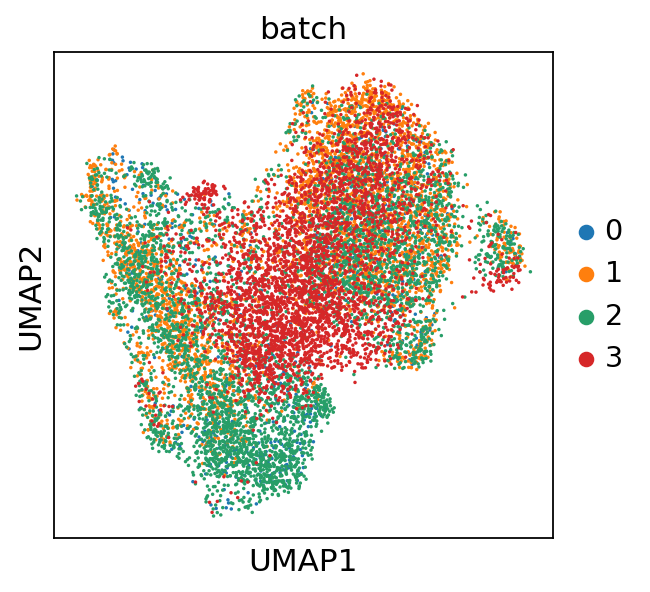

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:12)
Number of up-regulated genes in KO (BBKNN): 325


In [31]:
# BBKNN Integration

# Merging all large clusters into adatas 
adatas = [wt1_data_largest_clusters, wt2_data_largest_clusters, wt3_data_largest_clusters, ko_data_largest_clusters]
adata_integrated_bbknn = adatas[0].concatenate(adatas[1:], batch_key='batch', index_unique=None)
# Dimention reduction
sc.tl.pca(adata_integrated_bbknn, svd_solver='arpack')
sc.external.pp.bbknn(adata_integrated_bbknn, batch_key='batch')
sc.tl.umap(adata_integrated_bbknn)
sc.tl.leiden(adata_integrated_bbknn)
bbknn.ridge_regression(adata_integrated_bbknn, batch_key='batch', confounder_key=['leiden'] )
# Visualize batch effect
sc.pl.umap(
    adata_integrated_bbknn, color=["batch"], palette=sc.pl.palettes.vega_20_scanpy
)
# Ranking bbknn data
sc.tl.rank_genes_groups(adata_integrated_bbknn, groupby='leiden', method='wilcoxon')
# Finding up-regulated genes for KO
results_bbknn = adata_integrated_bbknn.uns['rank_genes_groups']
upregulated_genes_ko_bbknn = results_bbknn['names']['3'][(results_bbknn['pvals_adj']['3'] < 0.01) & (results_bbknn['logfoldchanges']['3'] > 0.5)]
num_upregulated_genes_ko_bbknn = len(upregulated_genes_ko_bbknn)
print("Number of up-regulated genes in KO (BBKNN):", num_upregulated_genes_ko_bbknn)

2024-03-25 03:26:53,345 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-03-25 03:27:03,862 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-03-25 03:27:03,933 - harmonypy - INFO - Iteration 1 of 10
2024-03-25 03:27:06,028 - harmonypy - INFO - Iteration 2 of 10
2024-03-25 03:27:07,920 - harmonypy - INFO - Converged after 2 iterations


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:08)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


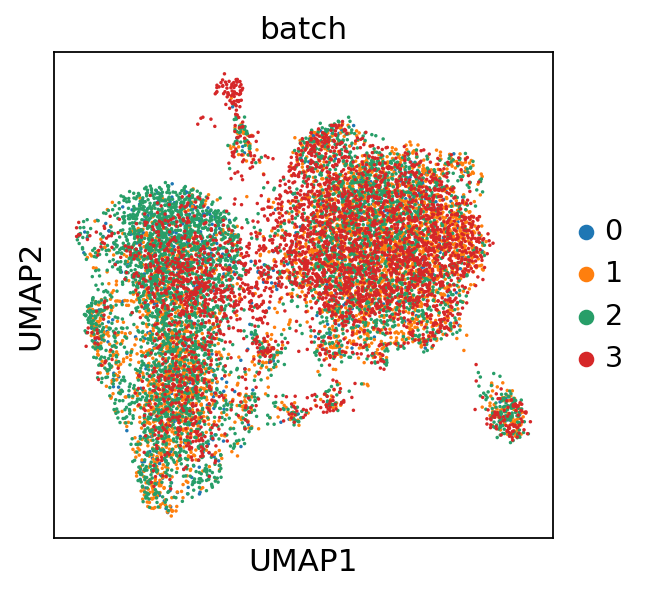

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)
Number of up-regulated genes in KO (Harmony): 412


In [32]:
# Harmony Integration

# Changing method to harmony
adata_integrated_harmony = adata_integrated_bbknn
sce.pp.harmony_integrate(adata_integrated_harmony, key='batch')
# Dimention reduction for harmony
sc.tl.pca(adata_integrated_harmony, svd_solver='arpack')
sc.pp.neighbors(adata_integrated_harmony, use_rep='X_pca_harmony')
sc.tl.umap(adata_integrated_harmony)
sc.tl.leiden(adata_integrated_harmony)
# Visualizing batch affect
sc.pl.umap(
    adata_integrated_harmony, color=["batch"], palette=sc.pl.palettes.vega_20_scanpy
)
# Ranking harmony genes
sc.tl.rank_genes_groups(adata_integrated_harmony, groupby='leiden', method='wilcoxon')
# Up-regulated KO number with Harmony method
results_harmony = adata_integrated_harmony.uns['rank_genes_groups']
upregulated_genes_ko_harmony = results_harmony['names']['3'][(results_harmony['pvals_adj']['3'] < 0.01) & (results_harmony['logfoldchanges']['3'] > 0.5)]
num_upregulated_genes_ko_harmony = len(upregulated_genes_ko_harmony)
print("Number of up-regulated genes in KO (Harmony):", num_upregulated_genes_ko_harmony)


In [33]:
# pseudo-time trajectory

sc.tl.pca(adata_integrated_bbknn, svd_solver="arpack")
sc.tl.diffmap(adata_integrated_bbknn)
# Clustering
sc.pp.neighbors(adata_integrated_bbknn, n_neighbors=10, use_rep="X_diffmap")
sc.tl.louvain(adata_integrated_bbknn, resolution=1.0)

# Compute the pseudotime trajectory with PAGA initialization
sc.tl.draw_graph(adata_integrated_bbknn)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.97912705 0.97542804 0.9711626  0.9454812  0.9094299
     0.9005126  0.89466274 0.8922684  0.8854739  0.876626   0.8750672
     0.8619523  0.85314995 0.84938276]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 30 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_gr

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


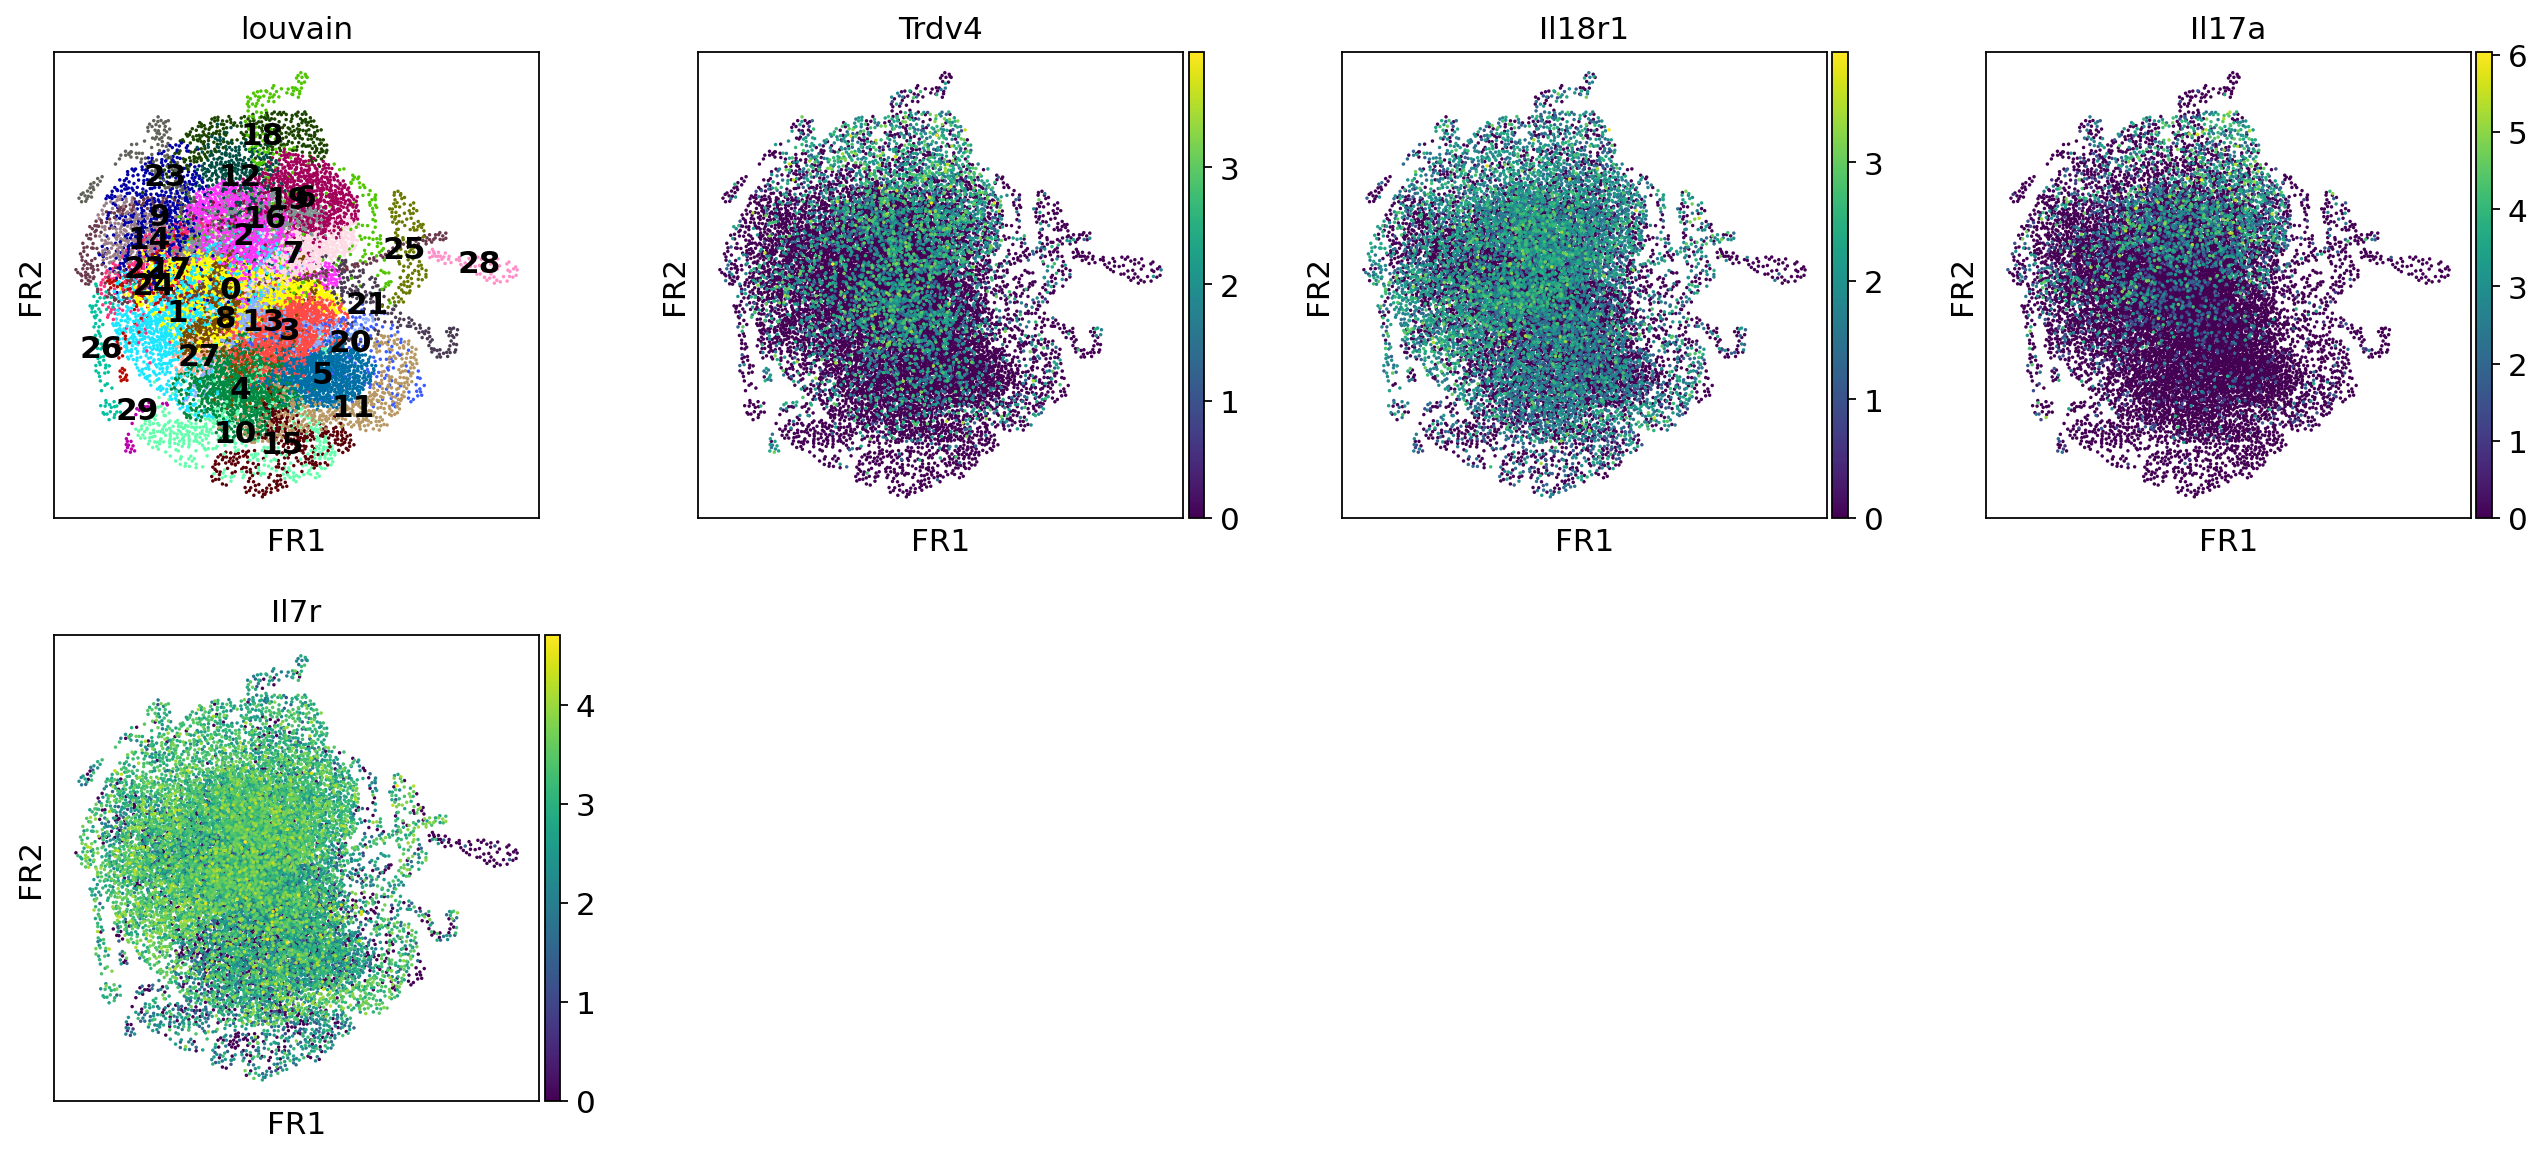

In [34]:
# Dimention reduction with louvain
sc.tl.paga(adata_integrated_bbknn, groups="louvain")
# Visualization pseudo-time trajectory with PAGA categories
sc.pl.draw_graph(
    adata_integrated_bbknn, 
    color=["louvain", "Trdv4", "Il18r1", "Il17a", "Il7r"], 
    legend_loc="on data"
)